In [1]:
import os
import pandas as pd
import numpy as np

import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)


,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [7]:
#Depmap
blca= pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_depmep/OmicsExpressionProteinCodingGenesTPMLogp1.csv',index_col=0)

blca.columns = [re.sub(r'\s*\(.*?\)', '', s) for s in list(blca.columns)]
blca

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [4]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= blca.loc[cell_line_ids]


### function

In [37]:
def compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness'):
    """
    Compute invasiveness score via dot product between expression and gene vector.

    Parameters:
        blca (pd.DataFrame): Gene expression DataFrame (samples as rows, genes as columns).
        vector (pd.DataFrame or pd.Series): Gene weights with gene names as index.
        vector_name (str): Column name to extract from DataFrame if `vector` is a DataFrame.
        score_name (str): Name for the output score column.

    Returns:
        pd.DataFrame: DataFrame with index as blca samples and one column: score_name.
    """
    # Align vector and expression matrix by intersecting genes
    common_genes = blca.columns.intersection(vector.index)
    common_genes = common_genes.intersection(genes_list)
    print(len(common_genes))
    print(common_genes)
    vector_aligned = vector.loc[common_genes]
    print(vector_aligned)
    if isinstance(vector_aligned, pd.DataFrame):
        vector_aligned = vector_aligned[vector_name]

    blca_aligned = blca[common_genes]
    print(blca_aligned)
    # Compute dot product
    scores = blca_aligned.dot(vector_aligned)

    # Wrap in DataFrame
    score_df = pd.DataFrame(scores, columns=[score_name])
    
    return score_df


### n67 m 45

In [9]:
vector = pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv_blca_n_m4.pkl')


In [10]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.061886 -0.022444
SCYL3    0.012118  0.001535
BAD     -0.005105 -0.008981
LAP3    -0.017072 -0.004030
SNX11   -0.001564 -0.001439
...           ...       ...
RBM15B  -0.003535 -0.002741
MRPL12   0.002266  0.004142
IKBKE    0.004438  0.006259
DUSP14  -0.014728 -0.006797
PIP4K2B -0.017575 -0.002515

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-18.089772
ACH-001289,-17.569559
ACH-001339,-18.934682
ACH-001538,-18.363134
ACH-000242,-21.131640
...,...
ACH-000285,-16.677273
ACH-002669,-17.863500
ACH-001858,-20.000903
ACH-001997,-19.246087


In [11]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-18.945118,CAL29
ACH-000593,-19.879207,BC3C
ACH-000396,-19.073378,J82
ACH-000242,-21.131640,RT4
ACH-000384,-20.591103,SW780
ACH-000018,-18.157589,T24
ACH-000724,-19.109221,HT1376


### LFC 2049

In [12]:
marker_genes_full= pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_917_DEG.xlsx')

In [13]:
marker_genes_full[:917]

,comparison,Unnamed: 1,Gene,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison.1,group1,group2
0,Cluster1_T2 vs Rest,4,UBE2C,0.9822,0.0178,4.010596,0.001418,0.000496,0,0.25,...,0.334958,0.395286,0.213788,0.107434,11.812131,5.131302,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
1,NaN,105,RAB21,0.9466,0.0534,2.875066,0.019782,0.002156,0,0.25,...,5.311281,1.071543,0.983983,0.363836,206.475265,23.013733,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
2,NaN,146,CDKN2A,0.9346,0.0654,2.659596,0.001872,0.000534,0,0.25,...,0.505571,0.348552,0.375348,0.182098,19.051186,5.818791,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
3,NaN,47,FRS2,0.9662,0.0338,3.352910,0.003166,0.000372,0,0.25,...,0.777159,0.176296,0.511838,0.120359,30.140633,3.747402,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
4,NaN,15,TOP2A,0.9780,0.0220,3.794467,0.000532,0.000189,0,0.25,...,0.115251,0.141165,0.098886,0.061220,4.366820,1.843869,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,NaN,3,BNIP3,0.9822,0.0178,4.010596,0.000025,0.001107,0,0.25,...,0.006267,0.798456,0.006267,0.351232,0.213063,10.703225,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
913,NaN,11,APP,0.9794,0.0206,3.861649,0.000018,0.001160,0,0.25,...,0.006267,0.746039,0.006267,0.457266,0.223948,11.128529,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
914,NaN,0,MEST,0.9866,0.0134,4.299009,0.000004,0.000363,0,0.25,...,0.000348,0.263124,0.000348,0.206426,0.017497,3.774674,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest
915,NaN,9,GATA2,0.9794,0.0206,3.861649,0.000012,0.001408,0,0.25,...,0.003134,0.959547,0.003134,0.422895,0.097166,13.323921,True,Cluster1_T2 vs Rest,Cluster1_T2,Rest


In [14]:
marker_genes_full= marker_genes_full.iloc[:917][['Gene','lfc_mean']]
marker_genes_full

,Gene,lfc_mean
0,UBE2C,5.149887
1,RAB21,4.855048
2,CDKN2A,4.822475
3,FRS2,4.680283
4,TOP2A,4.530674
...,...,...
912,BNIP3,-4.607275
913,APP,-5.565823
914,MEST,-5.999033
915,GATA2,-6.128490


In [15]:
marker_genes_full

,Gene,lfc_mean
0,UBE2C,5.149887
1,RAB21,4.855048
2,CDKN2A,4.822475
3,FRS2,4.680283
4,TOP2A,4.530674
...,...,...
912,BNIP3,-4.607275
913,APP,-5.565823
914,MEST,-5.999033
915,GATA2,-6.128490


In [16]:
marker_genes_full.set_index('Gene',inplace=True)

In [18]:
DPD_df = compute_invasiveness_score(blca, marker_genes_full, vector_name='lfc_mean', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
         lfc_mean
TSPAN6  -0.415048
SCYL3    0.775021
BAD     -0.311647
LAP3    -0.003558
SNX11   -1.454433
...           ...
RBM15B  -0.825212
MRPL12  -0.091045
IKBKE    1.059728
DUSP14  -1.949509
PIP4K2B -0.934780

[907 rows x 1 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000242  6.729417  2.456806  6.120186  5.712045  3.962549  1.996389   
...              ...       ...       ...       ...   

,invasiveness
ACH-001113,227.557339
ACH-001289,274.802878
ACH-001339,208.738663
ACH-001538,226.953134
ACH-000242,-56.752757
...,...
ACH-000285,506.975329
ACH-002669,120.305900
ACH-001858,76.340358
ACH-001997,64.262487


In [19]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,20.018192,CAL29
ACH-000593,117.235538,BC3C
ACH-000396,83.209008,J82
ACH-000242,-56.752757,RT4
ACH-000384,53.769299,SW780
ACH-000018,154.889250,T24
ACH-000724,246.321401,HT1376


	invasiveness	cell_line_name
ACH-000724	2330.059510	HT1376
ACH-000593	2112.445716	BC3C
ACH-000018	1842.661612	T24
ACH-000396	1741.714541	J82
ACH-000142	1671.339754	CAL29
ACH-000384	1359.179001	SW780
ACH-000242	468.987189	RT4
🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters

In [200]:
cell_lines_all= pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_depmep/cell lines in Bladder Urothelial Carcinoma.csv')
cell_lines_all

,Depmap Id,Cell Line,Primary Disease,Tumor Type
0,ACH-000545,VMCUB1,Bladder Urothelial Carcinoma,Primary
1,ACH-002235,DSH1,Bladder Urothelial Carcinoma,Primary
2,ACH-000384,SW780,Bladder Urothelial Carcinoma,Primary
3,ACH-000862,KMBC2,Bladder Urothelial Carcinoma,Primary
4,ACH-000834,UMUC1,Bladder Urothelial Carcinoma,Metastatic
5,ACH-000593,BC3C,Bladder Urothelial Carcinoma,Primary
6,ACH-000547,HT1197,Bladder Urothelial Carcinoma,Primary
7,ACH-000142,CAL29,Bladder Urothelial Carcinoma,Primary
8,ACH-001183,RT11284,Bladder Urothelial Carcinoma,Primary
9,ACH-000486,KU1919,Bladder Urothelial Carcinoma,Primary


In [201]:
cell_lines_all.set_index('Depmap Id',inplace=True)


In [202]:
cell_line_ids= cell_lines_all.index

In [203]:

DPD_cell_lines= DPD_df.loc[DPD_df.index.isin(cell_line_ids)]
cell_line_ids= DPD_cell_lines.index

for i in DPD_cell_lines.index:
    DPD_cell_lines.loc[i,'cell_line_name'] = cell_lines_all.loc[i,'Cell Line']

DPD_cell_lines.sort_values('invasiveness',ascending=True)

/tmp/ipykernel_1259488/3155373825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPD_cell_lines.loc[i,'cell_line_name'] = cell_lines_all.loc[i,'Cell Line']


,invasiveness,cell_line_name
ACH-000242,-56.752757,RT4
ACH-000834,5.379558,UMUC1
ACH-000862,5.728568,KMBC2
ACH-000142,20.018192,CAL29
ACH-000473,20.960080,RT112
ACH-000905,37.598347,5637
ACH-000384,53.769299,SW780
ACH-001415,56.369879,UMUC7
ACH-001409,69.940309,UMUC16
ACH-001416,70.962154,UMUC9


In [ ]:
genes_list = set(genes_list)
len(genes_list.intersection(adata_non_immune.var.highly_variable.index))


219

### SCT 4 vs 6 7

In [35]:
vector = pd.read_pickle(os.path.join('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm',"stv_lincs_sct_scR_inv_blca_n_m4.pkl"))

In [38]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


942
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=942)
                n         s
TSPAN6  -0.058804 -0.036012
SCYL3    0.007109 -0.000471
BAD     -0.021017 -0.021610
LAP3    -0.010614 -0.013504
SNX11   -0.013456 -0.003192
...           ...       ...
RBM15B  -0.000407 -0.005347
MRPL12   0.002414 -0.017673
IKBKE   -0.012472  0.002284
DUSP14  -0.015913 -0.008475
PIP4K2B -0.012797 -0.004687

[942 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-20.162555
ACH-001289,-20.931018
ACH-001339,-21.378334
ACH-001538,-20.979128
ACH-000242,-24.047185
...,...
ACH-000285,-17.677123
ACH-002669,-20.651463
ACH-001858,-22.643395
ACH-001997,-23.162881


In [39]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-21.985629,CAL29
ACH-000593,-21.915895,BC3C
ACH-000396,-21.464477,J82
ACH-000242,-24.047185,RT4
ACH-000384,-23.610193,SW780
ACH-000018,-20.741264,T24
ACH-000724,-21.742417,HT1376


### DEG from sctransform Cluster1 T2 vs Cluster 1 Ta

In [81]:
deg_sct = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_sctransform/invasive_sig.csv',index_col=0)
deg_sct

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
S100A8,0.000000,7.404326,0.992,0.021,0.000000
SPINK1,0.000000,-9.348946,0.013,0.878,0.000000
IGFBP2,0.000000,-10.457856,0.002,0.866,0.000000
MT1X,0.000000,5.460026,0.982,0.142,0.000000
S100A9,0.000000,4.301999,1.000,0.193,0.000000
...,...,...,...,...,...
MRPS12,0.000002,0.440868,0.300,0.240,0.048292
MTX3,0.000002,1.433329,0.040,0.015,0.048610
CRTC1,0.000002,1.025033,0.066,0.033,0.048650
CALM3,0.000002,-0.291653,0.332,0.401,0.049398


### Trying to normalize it 

In [122]:
vector = pd.DataFrame(
    np.zeros((len(deg_sct.index), 2)), 
    index=deg_sct.index,
    columns=['avg_log2FC', 'norm'] 
)


vector['avg_log2FC'] = deg_sct['avg_log2FC']
vector['norm'] =  vector['avg_log2FC']  / np.linalg.norm(vector['avg_log2FC'] )


In [124]:
df_l2_norm = blca.div(np.linalg.norm(blca.values, axis=1, keepdims=True), axis=0)
df_l2_norm

common_genes = blca.columns.intersection(vector.index)
common_genes = common_genes.intersection(genes_list)

print(len(common_genes))
print(common_genes)
vector_aligned = vector.loc[common_genes,'norm']
print(vector_aligned)


blca_aligned = df_l2_norm[common_genes]
print(blca_aligned)

527
Index(['TSPAN6', 'BAD', 'SNX11', 'FKBP4', 'MYCBP2', 'PAF1', 'ELAC2',
       'PAFAH1B1', 'KIAA0100', 'TRAPPC6A',
       ...
       'CEBPD', 'PLEKHM1', 'MIF', 'PRAF2', 'TWF2', 'HOXA10', 'LYN', 'RBM15B',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=527)
TSPAN6    -0.004599
BAD       -0.002668
SNX11     -0.008860
FKBP4     -0.003109
MYCBP2    -0.004378
             ...   
HOXA10    -0.007707
LYN       -0.017501
RBM15B    -0.007897
DUSP14    -0.009140
PIP4K2B   -0.007237
Name: norm, Length: 527, dtype: float64
              TSPAN6       BAD     SNX11     FKBP4    MYCBP2      PAF1  \
ACH-001113  0.008381  0.009982  0.008162  0.012832  0.006057  0.010452   
ACH-001289  0.008817  0.010701  0.008279  0.012231  0.007414  0.011145   
ACH-001339  0.006268  0.009050  0.008367  0.010672  0.006565  0.008987   
ACH-001538  0.010207  0.011115  0.006901  0.012931  0.009139  0.010202   
ACH-000242  0.013223  0.012026  0.007786  0.012109  0.009745  0.012430   
...              ...       .

In [126]:
scores = blca_aligned.dot(vector_aligned)

In [127]:
score_df = pd.DataFrame(scores, columns=['invasiveness'])

In [129]:
###DEGs 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_df_norm_lines= score_df.loc[cell_line_ids]
DPD_df_norm_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_df_norm_lines

,invasiveness,cell_line_name
ACH-000142,-0.022566,CAL29
ACH-000593,-0.021860,BC3C
ACH-000396,-0.021417,J82
ACH-000242,-0.023310,RT4
ACH-000384,-0.021806,SW780
ACH-000018,-0.021261,T24
ACH-000724,-0.020399,HT1376


In [92]:
DPD_df_norm = compute_invasiveness_score(blca, vector, vector_name='norm', score_name='invasiveness')
display(DPD_df_norm)

527
Index(['TSPAN6', 'BAD', 'SNX11', 'FKBP4', 'MYCBP2', 'PAF1', 'ELAC2',
       'PAFAH1B1', 'KIAA0100', 'TRAPPC6A',
       ...
       'CEBPD', 'PLEKHM1', 'MIF', 'PRAF2', 'TWF2', 'HOXA10', 'LYN', 'RBM15B',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=527)
TSPAN6    -1.052808
BAD       -0.610652
SNX11     -2.028295
FKBP4     -0.711647
MYCBP2    -1.002288
             ...   
HOXA10    -1.764401
LYN       -4.006422
RBM15B    -1.807695
DUSP14    -2.092425
PIP4K2B   -1.656791
Name: avg_log2FC, Length: 527, dtype: object
              TSPAN6       BAD     SNX11     FKBP4    MYCBP2      PAF1  \
ACH-001113  4.331992  5.159871  4.218781  6.632850  3.130931  5.402927   
ACH-001289  4.567424  5.543805  4.289097  6.336462  3.840967  5.773733   
ACH-001339  3.150560  4.549053  4.205549  5.364222  3.300124  4.517276   
ACH-001538  5.085340  5.537917  3.438293  6.442612  4.553361  5.082788   
ACH-000242  6.729417  6.120186  3.962549  6.162492  4.959306  6.326250   
...              ...   

,invasiveness
ACH-001113,-2339.567293
ACH-001289,-2300.904405
ACH-001339,-2371.020316
ACH-001538,-2316.772143
ACH-000242,-2715.713008
...,...
ACH-000285,-1879.012664
ACH-002669,-2223.044772
ACH-001858,-2545.666359
ACH-001997,-2441.826319


In [93]:
###DEGs 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_df_norm_lines= DPD_df_norm.loc[cell_line_ids]
DPD_df_norm_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_df_norm_lines

,invasiveness,cell_line_name
ACH-000142,-2620.6839,CAL29
ACH-000593,-2588.059223,BC3C
ACH-000396,-2572.707241,J82
ACH-000242,-2715.713008,RT4
ACH-000384,-2671.236646,SW780
ACH-000018,-2570.876394,T24
ACH-000724,-2457.146488,HT1376


In [ ]:
DPD_df_norm_lines

In [ ]:
cos_sim = np.dot(lfc_norm, x_norm)

In [83]:
vector = deg_sct['avg_log2FC']

In [84]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='avg_log2FC', score_name='invasiveness')
display(DPD_df)


527
Index(['TSPAN6', 'BAD', 'SNX11', 'FKBP4', 'MYCBP2', 'PAF1', 'ELAC2',
       'PAFAH1B1', 'KIAA0100', 'TRAPPC6A',
       ...
       'CEBPD', 'PLEKHM1', 'MIF', 'PRAF2', 'TWF2', 'HOXA10', 'LYN', 'RBM15B',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=527)
TSPAN6    -1.052808
BAD       -0.610652
SNX11     -2.028295
FKBP4     -0.711647
MYCBP2    -1.002288
             ...   
HOXA10    -1.764401
LYN       -4.006422
RBM15B    -1.807695
DUSP14    -2.092425
PIP4K2B   -1.656791
Name: avg_log2FC, Length: 527, dtype: float64
              TSPAN6       BAD     SNX11     FKBP4    MYCBP2      PAF1  \
ACH-001113  4.331992  5.159871  4.218781  6.632850  3.130931  5.402927   
ACH-001289  4.567424  5.543805  4.289097  6.336462  3.840967  5.773733   
ACH-001339  3.150560  4.549053  4.205549  5.364222  3.300124  4.517276   
ACH-001538  5.085340  5.537917  3.438293  6.442612  4.553361  5.082788   
ACH-000242  6.729417  6.120186  3.962549  6.162492  4.959306  6.326250   
...              ...  

,invasiveness
ACH-001113,-2339.567293
ACH-001289,-2300.904405
ACH-001339,-2371.020316
ACH-001538,-2316.772143
ACH-000242,-2715.713008
...,...
ACH-000285,-1879.012664
ACH-002669,-2223.044772
ACH-001858,-2545.666359
ACH-001997,-2441.826319


In [85]:
###DEGs 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-2620.683900,CAL29
ACH-000593,-2588.059223,BC3C
ACH-000396,-2572.707241,J82
ACH-000242,-2715.713008,RT4
ACH-000384,-2671.236646,SW780
ACH-000018,-2570.876394,T24
ACH-000724,-2457.146488,HT1376


In [87]:
DPD_cell_lines.sort_values('invasiveness',ascending=True)


,invasiveness,cell_line_name
ACH-000242,-2715.713008,RT4
ACH-000384,-2671.236646,SW780
ACH-000142,-2620.683900,CAL29
ACH-000593,-2588.059223,BC3C
ACH-000396,-2572.707241,J82
ACH-000018,-2570.876394,T24
ACH-000724,-2457.146488,HT1376


In [86]:
DPD_full_lines = DPD_df.loc[DPD_df.index.intersection(cell_lines_all['Depmap Id'])]

# Set the index of cell_lines_all to 'Depmap Id' for easy lookup
cell_lines_all_indexed = cell_lines_all.set_index('Depmap Id')

# Map cell line names to the filtered DataFrame
DPD_full_lines['cell_line_name'] = DPD_full_lines.index.map(cell_lines_all_indexed['Cell Line'])
DPD_full_lines.sort_values('invasiveness',ascending=True)


,invasiveness,cell_line_name
ACH-000862,-2852.757844,KMBC2
ACH-001415,-2747.826623,UMUC7
ACH-000242,-2715.713008,RT4
ACH-000720,-2672.153549,TCCSUP
ACH-000384,-2671.236646,SW780
ACH-000905,-2636.765164,5637
ACH-000142,-2620.683900,CAL29
ACH-001412,-2620.079618,UMUC10
ACH-000473,-2616.740123,RT112
ACH-000566,-2589.823817,SW1710


###DEGs 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
ACH-001113,0.008381,0.000000,0.014247,0.005403,0.008650,0.000055,0.002373,0.005890,0.012575,0.009170,...,0.005203,0.000366,0.000390,0.004122,0.001075,0.00000,0.000532,0.0,0.000000,0.000000
ACH-001289,0.008817,0.001129,0.013718,0.004910,0.006765,0.000000,0.000365,0.007361,0.008150,0.006721,...,0.002484,0.002026,0.000621,0.002827,0.001220,0.00000,0.000028,0.0,0.000000,0.000000
ACH-001339,0.006268,0.000000,0.014680,0.004642,0.008411,0.000113,0.002607,0.013304,0.007326,0.006512,...,0.001183,0.002184,0.001655,0.005862,0.000945,0.00000,0.000167,0.0,0.000000,0.000085
ACH-001538,0.010207,0.000000,0.014359,0.005110,0.006190,0.000000,0.011779,0.012375,0.009012,0.007942,...,0.000430,0.001269,0.000599,0.003295,0.000890,0.00000,0.000057,0.0,0.000000,0.000000
ACH-000242,0.013223,0.000000,0.012846,0.004827,0.007600,0.001570,0.014164,0.010945,0.014004,0.008976,...,0.002196,0.004635,0.000165,0.003754,0.000000,0.00000,0.000913,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.000110,0.000000,0.012844,0.006352,0.009671,0.000800,0.000190,0.001371,0.009393,0.010071,...,0.004336,0.000163,0.002548,0.005910,0.000671,0.00000,0.000000,0.0,0.000924,0.000083
ACH-002669,0.006486,0.000000,0.014660,0.003213,0.007640,0.000030,0.007556,0.014189,0.009325,0.009168,...,0.000394,0.000835,0.000743,0.002768,0.000000,0.00000,0.000030,0.0,0.000000,0.000000
ACH-001858,0.008716,0.000000,0.013921,0.003747,0.006456,0.000057,0.006525,0.013701,0.010741,0.006753,...,0.002179,0.000795,0.001218,0.003956,0.001399,0.00000,0.002907,0.0,0.000000,0.001044
ACH-001997,0.010055,0.000000,0.015538,0.005047,0.007741,0.000057,0.008112,0.013861,0.008887,0.006886,...,0.001654,0.001686,0.002570,0.004282,0.001366,0.00000,0.000000,0.0,0.000000,0.000000


In [ ]:
blca_aligned = df_l2_norm[common_genes]


In [ ]:


    blca_aligned = blca[common_genes]
    print(blca_aligned)
    # Compute dot product
    scores = blca_aligned.dot(vector_aligned)

    # Wrap in DataFrame
    score_df = pd.DataFrame(scores, columns=[score_name])
    
    return score_df

### Canonical C1 cell across conditions

In [52]:
cano_sct = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_sctransform/canonical_c1_sig.csv',index_col=0)
cano_sct

,T2_p_val,T2_avg_log2FC,T2_pct.1,T2_pct.2,T2_p_val_adj,T3_p_val,T3_avg_log2FC,T3_pct.1,T3_pct.2,T3_p_val_adj,Ta_p_val,Ta_avg_log2FC,Ta_pct.1,Ta_pct.2,Ta_p_val_adj,max_pval,minimump_p_val
LY6D,0.000000,2.002764,0.982,0.262,0.0,7.004882e-135,-4.301575,0.026,0.401,1.404269e-130,7.382819e-08,-0.278775,0.676,0.684,1.480034e-03,7.382819e-08,0.000000
SPINK1,0.000000,-9.247719,0.014,0.716,0.0,2.586248e-54,0.475454,0.964,0.880,5.184652e-50,1.015223e-72,0.517983,0.881,0.618,2.035217e-68,2.586248e-54,0.000000
GDF15,0.000000,-8.072465,0.023,0.700,0.0,1.787030e-170,1.020917,0.956,0.668,3.582459e-166,2.348407e-268,1.386799,0.786,0.391,4.707852e-264,1.787030e-170,0.000000
S100A8,0.000000,2.655590,0.991,0.333,0.0,5.820149e-89,2.175099,0.189,0.051,1.166765e-84,1.422108e-113,-5.145434,0.023,0.272,2.850899e-109,5.820149e-89,0.000000
C1orf56,0.000000,1.659234,0.986,0.341,0.0,3.448914e-24,0.853223,0.294,0.177,6.914039e-20,4.464852e-04,-1.051091,0.513,0.374,1.000000e+00,4.464852e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDK5RAP2,0.009383,-0.707728,0.010,0.017,1.0,4.744247e-02,-0.589391,0.016,0.026,1.000000e+00,1.747996e-02,0.541020,0.031,0.022,1.000000e+00,4.744247e-02,0.027884
FKBPL,0.035476,-0.318828,0.040,0.050,1.0,1.009826e-02,0.501140,0.047,0.033,1.000000e+00,4.468918e-02,-0.486583,0.020,0.028,1.000000e+00,4.468918e-02,0.029990
RASA1,0.013834,0.382158,0.045,0.035,1.0,1.867157e-02,-0.498137,0.031,0.046,1.000000e+00,4.724788e-02,0.323472,0.062,0.051,1.000000e+00,4.724788e-02,0.040929
NCOA1,0.018606,-0.345868,0.038,0.049,1.0,1.515102e-02,-0.403966,0.047,0.064,1.000000e+00,4.262022e-02,0.275098,0.079,0.066,1.000000e+00,4.262022e-02,0.044768


In [72]:
# Filter: T2 is positive and greater than T3 and Ta
dominant_T2 = cano_sct[
    (cano_sct['T2_avg_log2FC'] > 0) &
    (cano_sct['T2_avg_log2FC'] > cano_sct['T3_avg_log2FC']) &
    (cano_sct['T2_avg_log2FC'] > cano_sct['Ta_avg_log2FC'])
]

# Optionally sort by strength of upregulation
dominant_T2 = dominant_T2.sort_values(by='T2_avg_log2FC', ascending=False)

# Display top results
dominant_T2.head()


,T2_p_val,T2_avg_log2FC,T2_pct.1,T2_pct.2,T2_p_val_adj,T3_p_val,T3_avg_log2FC,T3_pct.1,T3_pct.2,T3_p_val_adj,Ta_p_val,Ta_avg_log2FC,Ta_pct.1,Ta_pct.2,Ta_p_val_adj,max_pval,minimump_p_val
S100A7,0.000000e+00,3.364913,0.659,0.167,0.000000e+00,3.994226e-19,2.692334,0.038,0.010,8.007224e-15,1.244659e-75,-9.685319,0.002,0.174,2.495167e-71,3.994226e-19,0.000000e+00
SBSN,5.998482e-191,2.673416,0.242,0.053,1.202516e-186,3.278344e-03,-0.869954,0.003,0.013,1.000000e+00,4.923994e-12,-1.087123,0.031,0.076,9.871132e-08,3.278344e-03,1.799545e-190
SPRR1B,0.000000e+00,2.663724,0.395,0.097,0.000000e+00,3.970502e-02,-0.233809,0.028,0.020,1.000000e+00,1.339954e-21,-1.651101,0.040,0.115,2.686206e-17,3.970502e-02,0.000000e+00
S100A8,0.000000e+00,2.655590,0.991,0.333,0.000000e+00,5.820149e-89,2.175099,0.189,0.051,1.166765e-84,1.422108e-113,-5.145434,0.023,0.272,2.850899e-109,5.820149e-89,0.000000e+00
S100A9,0.000000e+00,2.350610,0.998,0.469,0.000000e+00,2.048959e-136,1.857864,0.444,0.170,4.107548e-132,2.305268e-46,-2.131544,0.201,0.334,4.621371e-42,2.305268e-46,0.000000e+00


In [75]:
dominant_T2

,T2_p_val,T2_avg_log2FC,T2_pct.1,T2_pct.2,T2_p_val_adj,T3_p_val,T3_avg_log2FC,T3_pct.1,T3_pct.2,T3_p_val_adj,Ta_p_val,Ta_avg_log2FC,Ta_pct.1,Ta_pct.2,Ta_p_val_adj,max_pval,minimump_p_val
S100A7,0.000000e+00,3.364913,0.659,0.167,0.000000e+00,3.994226e-19,2.692334,0.038,0.010,8.007224e-15,1.244659e-75,-9.685319,0.002,0.174,2.495167e-71,3.994226e-19,0.000000e+00
SBSN,5.998482e-191,2.673416,0.242,0.053,1.202516e-186,3.278344e-03,-0.869954,0.003,0.013,1.000000e+00,4.923994e-12,-1.087123,0.031,0.076,9.871132e-08,3.278344e-03,1.799545e-190
SPRR1B,0.000000e+00,2.663724,0.395,0.097,0.000000e+00,3.970502e-02,-0.233809,0.028,0.020,1.000000e+00,1.339954e-21,-1.651101,0.040,0.115,2.686206e-17,3.970502e-02,0.000000e+00
S100A8,0.000000e+00,2.655590,0.991,0.333,0.000000e+00,5.820149e-89,2.175099,0.189,0.051,1.166765e-84,1.422108e-113,-5.145434,0.023,0.272,2.850899e-109,5.820149e-89,0.000000e+00
S100A9,0.000000e+00,2.350610,0.998,0.469,0.000000e+00,2.048959e-136,1.857864,0.444,0.170,4.107548e-132,2.305268e-46,-2.131544,0.201,0.334,4.621371e-42,2.305268e-46,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPLP2,3.268700e-60,0.140667,1.000,1.000,6.552763e-56,1.084892e-44,-0.183996,0.997,0.999,2.174882e-40,1.140390e-107,-0.323817,0.997,1.000,2.286139e-103,1.084892e-44,3.421169e-107
EIF3K,1.679462e-03,0.133657,0.739,0.732,1.000000e+00,3.018756e-27,-0.446011,0.623,0.747,6.051700e-23,8.634403e-24,-0.327027,0.675,0.767,1.730939e-19,1.679462e-03,9.056268e-27
CIRBP,2.892881e-02,0.117215,0.697,0.710,1.000000e+00,4.319805e-12,-0.374712,0.673,0.719,8.659913e-08,1.534792e-10,-0.235271,0.673,0.732,3.076797e-06,2.892881e-02,1.295941e-11
RPL5,6.440837e-08,0.101254,0.947,0.940,1.291195e-03,9.672350e-236,-1.246542,0.903,0.973,1.939016e-231,4.018480e-25,-0.262494,0.971,0.979,8.055847e-21,6.440837e-08,2.901705e-235


In [74]:
# Genes more downregulated in T2 than in T3 and Ta
T2_down = cano_sct[
    (cano_sct['T2_avg_log2FC'] < 0) &
    (cano_sct['T2_avg_log2FC'] < cano_sct['T3_avg_log2FC']) &
    (cano_sct['T2_avg_log2FC'] < cano_sct['Ta_avg_log2FC'])
].sort_values(by='T2_avg_log2FC')

T2_down.head()


,T2_p_val,T2_avg_log2FC,T2_pct.1,T2_pct.2,T2_p_val_adj,T3_p_val,T3_avg_log2FC,T3_pct.1,T3_pct.2,T3_p_val_adj,Ta_p_val,Ta_avg_log2FC,Ta_pct.1,Ta_pct.2,Ta_p_val_adj,max_pval,minimump_p_val
CA2,1.313146e-165,-9.872702,0.000,0.221,2.632463e-161,4.350962e-112,1.613935,0.308,0.098,8.722374e-108,6.874600e-06,1.288958,0.018,0.008,1.378151e-01,6.874600e-06,3.939437e-165
ITLN1,1.412136e-35,-9.578465,0.000,0.052,2.830908e-31,3.567942e-02,-0.383951,0.047,0.035,1.000000e+00,6.791816e-18,1.578915,0.039,0.013,1.361555e-13,3.567942e-02,4.236407e-35
ALDH7A1,1.043374e-158,-9.416430,0.000,0.213,2.091653e-154,2.427924e-03,0.215095,0.246,0.208,1.000000e+00,1.131480e-03,0.284723,0.156,0.128,1.000000e+00,2.427924e-03,3.130123e-158
LCN15,8.572940e-67,-9.364116,0.000,0.098,1.718617e-62,1.176217e-57,2.109135,0.171,0.056,2.357962e-53,3.516020e-09,1.248050,0.027,0.011,7.048565e-05,3.516020e-09,2.571882e-66
SPINK1,0.000000e+00,-9.247719,0.014,0.716,0.000000e+00,2.586248e-54,0.475454,0.964,0.880,5.184652e-50,1.015223e-72,0.517983,0.881,0.618,2.035217e-68,2.586248e-54,0.000000e+00


In [78]:
vector = T2_down['T2_avg_log2FC']
T2_down = compute_invasiveness_score(blca, vector, vector_name='avg_log2FC', score_name='invasiveness')
display(T2_down)

182
Index(['BAD', 'SNX11', 'CASP10', 'PAFAH1B1', 'TRAPPC6A', 'CYB561', 'CAPN1',
       'BID', 'ALAS1', 'TOMM34',
       ...
       'SRC', 'LRP10', 'HLA-DMA', 'DDR1', 'CSNK1E', 'PLEKHM1', 'CEBPA', 'LYN',
       'RBM15B', 'DUSP14'],
      dtype='object', length=182)
BAD        -0.814290
SNX11      -2.793999
CASP10     -0.693355
PAFAH1B1   -0.625870
TRAPPC6A   -0.840985
              ...   
PLEKHM1    -2.419123
CEBPA      -1.076628
LYN        -3.332088
RBM15B     -1.539208
DUSP14     -3.581677
Name: T2_avg_log2FC, Length: 182, dtype: float64
                 BAD     SNX11    CASP10  PAFAH1B1  TRAPPC6A    CYB561  \
ACH-001113  5.159871  4.218781  2.000000  6.481880  4.893848  5.196135   
ACH-001289  5.543805  4.289097  0.286881  6.247928  4.448901  1.555816   
ACH-001339  4.549053  4.205549  1.207893  6.324091  3.852998  2.330558   
ACH-001538  5.537917  3.438293  2.704872  5.539779  4.844486  5.770036   
ACH-000242  6.120186  3.962549  1.996389  4.682573  5.269781  5.930974   
...        

,invasiveness
ACH-001113,-1369.914946
ACH-001289,-1335.637426
ACH-001339,-1441.769228
ACH-001538,-1396.738585
ACH-000242,-1583.649395
...,...
ACH-000285,-1090.592120
ACH-002669,-1344.766996
ACH-001858,-1510.188576
ACH-001997,-1410.613889


In [80]:
### Not really 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

down_cell_lines= T2_down.loc[cell_line_ids]
down_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
down_cell_lines

,invasiveness,cell_line_name
ACH-000142,-1543.467901,CAL29
ACH-000593,-1491.500536,BC3C
ACH-000396,-1513.699838,J82
ACH-000242,-1583.649395,RT4
ACH-000384,-1479.515095,SW780
ACH-000018,-1529.456049,T24
ACH-000724,-1403.515969,HT1376


In [76]:
vector = dominant_T2['T2_avg_log2FC']
T2_up = compute_invasiveness_score(blca, vector, vector_name='avg_log2FC', score_name='invasiveness')
display(T2_up)

38
Index(['SYPL1', 'CD44', 'CDC42', 'MEF2C', 'RPS5', 'CIRBP', 'TJP1', 'LSM5',
       'RPA3', 'ST3GAL5', 'CEBPZ', 'PLA2G4A', 'NENF', 'TM9SF2', 'KTN1', 'APOE',
       'EDEM1', 'YME1L1', 'ADAM10', 'TP53', 'IFNAR1', 'TMCO1', 'SCCPDH', 'LBR',
       'RASA1', 'CDKN2A', 'EML3', 'NT5DC2', 'PPIC', 'FOS', 'CYCS', 'NET1',
       'ACBD3', 'MUC1', 'PDGFA', 'CTNND1', 'HSPA1A', 'HOXA10'],
      dtype='object')
SYPL1      0.456399
CD44       1.212534
CDC42      1.670481
MEF2C      1.261663
RPS5       0.321301
CIRBP      0.117215
TJP1       0.495446
LSM5       0.443680
RPA3       0.375117
ST3GAL5    0.300514
CEBPZ      0.539663
PLA2G4A    1.011528
NENF       0.733453
TM9SF2     0.463413
KTN1       0.594780
APOE       1.501477
EDEM1      0.682553
YME1L1     0.513893
ADAM10     0.498169
TP53       0.888576
IFNAR1     0.455540
TMCO1      0.649761
SCCPDH     0.694248
LBR        0.841311
RASA1      0.382158
CDKN2A     1.331570
EML3       0.578186
NT5DC2     0.645336
PPIC       0.388321
FOS        1.001186
C

,invasiveness
ACH-001113,149.469244
ACH-001289,135.758377
ACH-001339,158.953334
ACH-001538,145.511269
ACH-000242,139.722363
...,...
ACH-000285,125.746788
ACH-002669,133.341329
ACH-001858,156.738954
ACH-001997,153.280016


In [77]:
### Not really 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

up_cell_lines= T2_up.loc[cell_line_ids]
up_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
up_cell_lines

,invasiveness,cell_line_name
ACH-000142,148.544469,CAL29
ACH-000593,150.319027,BC3C
ACH-000396,145.172635,J82
ACH-000242,139.722363,RT4
ACH-000384,155.743992,SW780
ACH-000018,150.085314,T24
ACH-000724,154.288722,HT1376


In [54]:
### Not really 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-1451.414300,CAL29
ACH-000593,-1401.746847,BC3C
ACH-000396,-1425.686600,J82
ACH-000242,-1500.858661,RT4
ACH-000384,-1382.314139,SW780
ACH-000018,-1441.913230,T24
ACH-000724,-1312.693385,HT1376


In [55]:
vector = cano_sct['T3_avg_log2FC']
DPD_df_lum_inv = compute_invasiveness_score(blca, vector, vector_name='T3_avg_log2FC', score_name='invasiveness')
display(DPD_df_lum_inv)

261
Index(['BAD', 'SNX11', 'CASP10', 'MYCBP2', 'PAFAH1B1', 'TRAPPC6A', 'SYPL1',
       'CYB561', 'CAPN1', 'BID',
       ...
       'HLA-DMA', 'HSPA1A', 'DDR1', 'CSNK1E', 'PLEKHM1', 'CEBPA', 'HOXA10',
       'LYN', 'RBM15B', 'DUSP14'],
      dtype='object', length=261)
BAD         0.183174
SNX11       0.944026
CASP10      0.875848
MYCBP2     -0.383489
PAFAH1B1   -0.447148
              ...   
CEBPA       0.925336
HOXA10     -3.897612
LYN         0.655053
RBM15B      0.399389
DUSP14      0.990949
Name: T3_avg_log2FC, Length: 261, dtype: float64
                 BAD     SNX11    CASP10    MYCBP2  PAFAH1B1  TRAPPC6A  \
ACH-001113  5.159871  4.218781  2.000000  3.130931  6.481880  4.893848   
ACH-001289  5.543805  4.289097  0.286881  3.840967  6.247928  4.448901   
ACH-001339  4.549053  4.205549  1.207893  3.300124  6.324091  3.852998   
ACH-001538  5.537917  3.438293  2.704872  4.553361  5.539779  4.844486   
ACH-000242  6.120186  3.962549  1.996389  4.959306  4.682573  5.269781   
...    

,invasiveness
ACH-001113,36.551695
ACH-001289,29.309354
ACH-001339,-9.735265
ACH-001538,52.141083
ACH-000242,40.573837
...,...
ACH-000285,25.046740
ACH-002669,71.935050
ACH-001858,13.038318
ACH-001997,41.204167


In [ ]:
### Not really 
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

In [56]:
DPD_cell_lines['T3_luminal']=0

for i in cell_line_ids:
    DPD_cell_lines.loc[i,'T3_luminal'] = DPD_df_lum_inv.loc[i,'invasiveness']

/tmp/ipykernel_192859/4135068379.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47.6941849564259' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DPD_cell_lines.loc[i,'T3_luminal'] = DPD_df_lum_inv.loc[i,'invasiveness']


In [57]:
DPD_cell_lines

,invasiveness,cell_line_name,T3_luminal
ACH-000142,-1451.414300,CAL29,47.694185
ACH-000593,-1401.746847,BC3C,38.734214
ACH-000396,-1425.686600,J82,51.613814
ACH-000242,-1500.858661,RT4,40.573837
ACH-000384,-1382.314139,SW780,33.301555
ACH-000018,-1441.913230,T24,30.680166
ACH-000724,-1312.693385,HT1376,38.620627


In [58]:
vector = cano_sct['Ta_avg_log2FC']
DPD_df_lum_ta = compute_invasiveness_score(blca, vector, vector_name='Ta_avg_log2FC', score_name='invasiveness')
display(DPD_df_lum_ta)

261
Index(['BAD', 'SNX11', 'CASP10', 'MYCBP2', 'PAFAH1B1', 'TRAPPC6A', 'SYPL1',
       'CYB561', 'CAPN1', 'BID',
       ...
       'HLA-DMA', 'HSPA1A', 'DDR1', 'CSNK1E', 'PLEKHM1', 'CEBPA', 'HOXA10',
       'LYN', 'RBM15B', 'DUSP14'],
      dtype='object', length=261)
BAD         0.260213
SNX11       0.597201
CASP10      0.462609
MYCBP2      0.281860
PAFAH1B1    0.371015
              ...   
CEBPA       0.657536
HOXA10      0.270196
LYN         0.927758
RBM15B      0.631821
DUSP14      0.410953
Name: Ta_avg_log2FC, Length: 261, dtype: float64
                 BAD     SNX11    CASP10    MYCBP2  PAFAH1B1  TRAPPC6A  \
ACH-001113  5.159871  4.218781  2.000000  3.130931  6.481880  4.893848   
ACH-001289  5.543805  4.289097  0.286881  3.840967  6.247928  4.448901   
ACH-001339  4.549053  4.205549  1.207893  3.300124  6.324091  3.852998   
ACH-001538  5.537917  3.438293  2.704872  4.553361  5.539779  4.844486   
ACH-000242  6.120186  3.962549  1.996389  4.959306  4.682573  5.269781   
...    

,invasiveness
ACH-001113,241.174650
ACH-001289,216.481601
ACH-001339,231.856062
ACH-001538,235.585296
ACH-000242,291.995421
...,...
ACH-000285,143.397935
ACH-002669,220.282193
ACH-001858,257.081895
ACH-001997,253.364755


In [59]:
DPD_cell_lines['Ta_luminal']=0

for i in cell_line_ids:
    DPD_cell_lines.loc[i,'Ta_luminal'] = DPD_df_lum_ta.loc[i,'invasiveness']

/tmp/ipykernel_192859/338538930.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '272.6132531989466' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DPD_cell_lines.loc[i,'Ta_luminal'] = DPD_df_lum_ta.loc[i,'invasiveness']


In [60]:
DPD_cell_lines

,invasiveness,cell_line_name,T3_luminal,Ta_luminal
ACH-000142,-1451.414300,CAL29,47.694185,272.613253
ACH-000593,-1401.746847,BC3C,38.734214,244.121531
ACH-000396,-1425.686600,J82,51.613814,253.827973
ACH-000242,-1500.858661,RT4,40.573837,291.995421
ACH-000384,-1382.314139,SW780,33.301555,289.438410
ACH-000018,-1441.913230,T24,30.680166,242.027994
ACH-000724,-1312.693385,HT1376,38.620627,246.844622


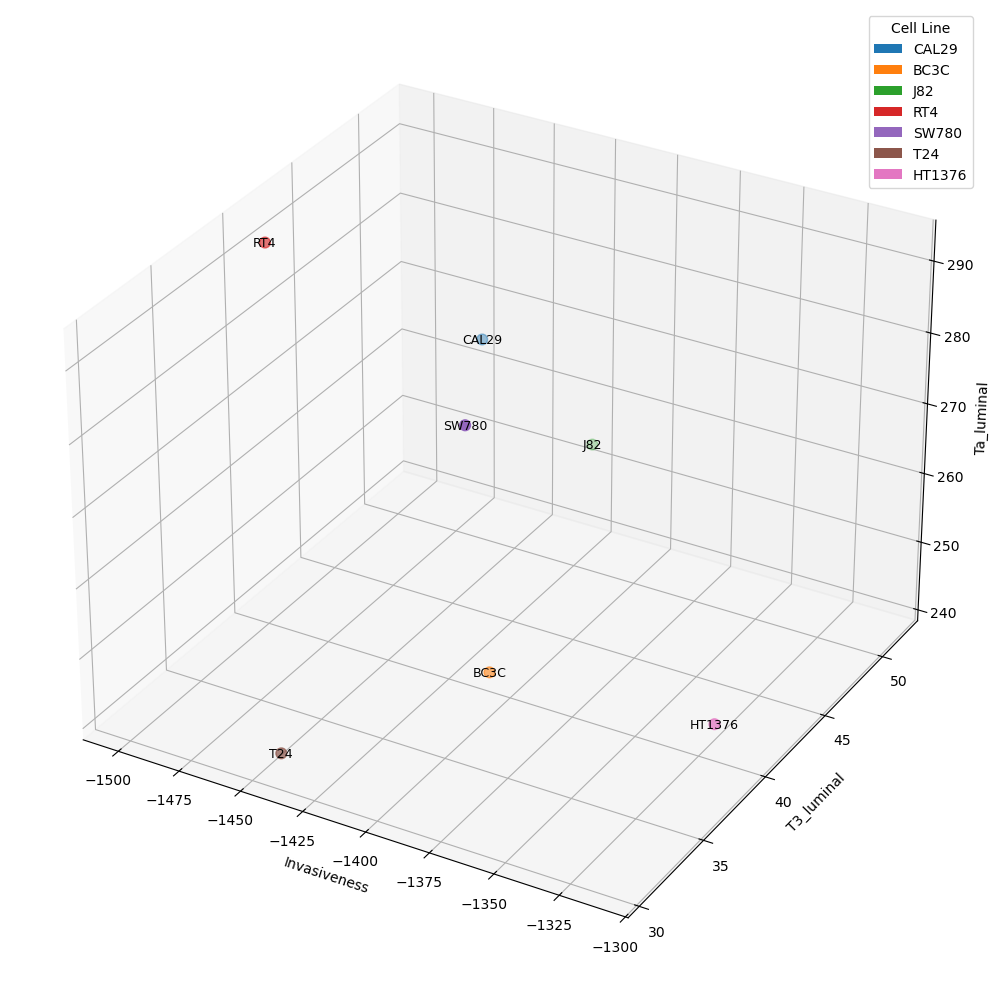

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Assume DPD_cell_lines is your DataFrame
unique_lines = DPD_cell_lines['cell_line_name'].unique()
palette = sns.color_palette("tab10", len(unique_lines))
color_map = dict(zip(unique_lines, palette))

# Map cell lines to colors
DPD_cell_lines['color'] = DPD_cell_lines['cell_line_name'].map(color_map)

# Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter
ax.scatter(DPD_cell_lines['invasiveness'],
           DPD_cell_lines['T3_luminal'],
           DPD_cell_lines['Ta_luminal'],
           c=DPD_cell_lines['color'],
           s=60)

# Labels for each point
for _, row in DPD_cell_lines.iterrows():
    ax.text(row['invasiveness'], row['T3_luminal'], row['Ta_luminal'], row['cell_line_name'],
            fontsize=9, ha='center', va='center')

# Axes labels
ax.set_xlabel('Invasiveness')
ax.set_ylabel('T3_luminal')
ax.set_zlabel('Ta_luminal')

# Legend (optional)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[name], label=name) for name in unique_lines]
ax.legend(handles=legend_elements, title='Cell Line', loc='best')

plt.tight_layout()
plt.show()


In [64]:

import plotly.express as px
fig = px.scatter_3d(DPD_cell_lines, x='invasiveness', y='T3_luminal', z='Ta_luminal', color='cell_line_name')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### New STV

In [64]:
#cluster 1 T2 vs the rest
vector = pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv_blca_cluster1.pkl')
vector

,n,s
Gene,,
TSPAN6,-0.038287,-0.029687
SCYL3,0.000261,0.001381
BAD,-0.029879,-0.013170
LAP3,-0.017974,-0.003082
SNX11,-0.002813,-0.001881
...,...,...
RBM15B,-0.001025,-0.005267
MRPL12,-0.002000,0.001843
IKBKE,0.006634,0.005225


In [69]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.038287 -0.029687
SCYL3    0.000261  0.001381
BAD     -0.029879 -0.013170
LAP3    -0.017974 -0.003082
SNX11   -0.002813 -0.001881
...           ...       ...
RBM15B  -0.001025 -0.005267
MRPL12  -0.002000  0.001843
IKBKE    0.006634  0.005225
DUSP14   0.000019 -0.005522
PIP4K2B -0.013423 -0.002342

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-15.740099
ACH-001289,-15.184335
ACH-001339,-16.033912
ACH-001538,-16.955661
ACH-000242,-19.688760
...,...
ACH-000285,-12.875748
ACH-002669,-15.908613
ACH-001858,-18.104518
ACH-001997,-18.343390


In [70]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-17.248543,CAL29
ACH-000593,-17.120781,BC3C
ACH-000396,-17.424083,J82
ACH-000242,-19.688760,RT4
ACH-000384,-18.925200,SW780
ACH-000018,-15.984505,T24
ACH-000724,-18.903717,HT1376


In [ ]:
###
RT4     468          T1 Low grade papillary 
SW780  1359.179001   Low grade 
CAL29  1671.339754   T2
J82    1741.714541   T3 
T24    1842.661612   Invasive High Grade T2
BC3C   2112.445716   Invasive
HT1376 2330.059510   Invasive

In [ ]:
marker_genes_full= pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG_4000HVG.xlsx')
marker_genes_full

In [46]:
#4000HVG genes LFG via scvi
vector= marker_genes_full.iloc[56002:][['Gene','lfc_mean']]
vector.set_index('Gene',inplace=True)
vector

,lfc_mean
Gene,
AC018816.3,6.222242
SERPINB3,6.162135
CRIP1,5.903608
C1orf56,5.485808
AMFR,5.312927
...,...
TESC,-7.088674
SPOCD1,-7.227857
IGFBP5,-8.091389


In [53]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='lfc_mean', score_name='invasiveness')
display(DPD_df)


435
Index(['TSPAN6', 'BAD', 'LAP3', 'CFLAR', 'FKBP4', 'RBM6', 'MYCBP2', 'RALA',
       'PAF1', 'PAFAH1B1',
       ...
       'MLLT11', 'VDAC1', 'CSNK1E', 'MYCBP', 'FIS1', 'CEBPD', 'CEBPA', 'TWF2',
       'CHMP4A', 'MRPL12'],
      dtype='object', length=435)
        lfc_mean
TSPAN6 -0.418599
BAD    -0.453550
LAP3   -0.004983
CFLAR  -0.101578
FKBP4  -0.594557
...          ...
CEBPD  -0.877770
CEBPA   0.490690
TWF2   -0.737330
CHMP4A  0.321524
MRPL12 -0.235921

[435 rows x 1 columns]
              TSPAN6       BAD      LAP3     CFLAR     FKBP4      RBM6  \
ACH-001113  4.331992  5.159871  4.783457  5.040454  6.632850  5.515069   
ACH-001289  4.567424  5.543805  6.333782  4.414812  6.336462  5.490570   
ACH-001339  3.150560  4.549053  6.161081  4.683135  5.364222  4.513491   
ACH-001538  5.085340  5.537917  5.244887  4.514122  6.442612  5.146085   
ACH-000242  6.729417  6.120186  5.712045  4.348374  6.162492  6.155628   
...              ...       ...       ...       ...       ...       ..

,invasiveness
ACH-001113,-459.722321
ACH-001289,-394.349854
ACH-001339,-487.256049
ACH-001538,-432.318457
ACH-000242,-624.166781
...,...
ACH-000285,-297.315072
ACH-002669,-449.005171
ACH-001858,-497.433834
ACH-001997,-485.427753


In [51]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-618.045371,CAL29
ACH-000593,-525.858860,BC3C
ACH-000396,-577.039902,J82
ACH-000242,-624.166781,RT4
ACH-000384,-602.953211,SW780
ACH-000018,-525.312218,T24
ACH-000724,-494.918979,HT1376


In [54]:
DPD_cell_lines.sort_values('invasiveness',ascending=True)
#Less precise than 

,invasiveness,cell_line_name
ACH-000242,-624.166781,RT4
ACH-000142,-618.045371,CAL29
ACH-000384,-602.953211,SW780
ACH-000396,-577.039902,J82
ACH-000593,-525.858860,BC3C
ACH-000018,-525.312218,T24
ACH-000724,-494.918979,HT1376


### N16 M STV all male

In [74]:
vector = pd.read_pickle(os.path.join('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm',"stv_lincs_scR_inv_blca_N_M16.pkl"))
vector

,n,s
Gene,,
TSPAN6,-0.061886,-0.022444
SCYL3,0.012118,0.001535
BAD,-0.005105,-0.008981
LAP3,-0.017072,-0.004030
SNX11,-0.001564,-0.001439
...,...,...
RBM15B,-0.003535,-0.002741
MRPL12,0.002266,0.004142
IKBKE,0.004438,0.006259


In [75]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.061886 -0.022444
SCYL3    0.012118  0.001535
BAD     -0.005105 -0.008981
LAP3    -0.017072 -0.004030
SNX11   -0.001564 -0.001439
...           ...       ...
RBM15B  -0.003535 -0.002741
MRPL12   0.002266  0.004142
IKBKE    0.004438  0.006259
DUSP14  -0.014728 -0.006797
PIP4K2B -0.017575 -0.002515

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-18.089772
ACH-001289,-17.569559
ACH-001339,-18.934682
ACH-001538,-18.363134
ACH-000242,-21.131640
...,...
ACH-000285,-16.677273
ACH-002669,-17.863500
ACH-001858,-20.000903
ACH-001997,-19.246087


In [76]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-18.945118,CAL29
ACH-000593,-19.879207,BC3C
ACH-000396,-19.073378,J82
ACH-000242,-21.131640,RT4
ACH-000384,-20.591103,SW780
ACH-000018,-18.157589,T24
ACH-000724,-19.109221,HT1376


In [33]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-18.945118,CAL29
ACH-000593,-19.879207,BC3C
ACH-000396,-19.073378,J82
ACH-000242,-21.131640,RT4
ACH-000384,-20.591103,SW780
ACH-000018,-18.157589,T24
ACH-000724,-19.109221,HT1376


### n67, m45

In [94]:
vector = pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv_blca_N67_M45.pkl')
vector

,n,s
Gene,,
TSPAN6,-0.027972,-0.022183
SCYL3,-0.014587,0.001072
BAD,0.020864,0.015721
LAP3,0.005528,0.003804
SNX11,0.014096,0.004716
...,...,...
RBM15B,-0.012118,0.002074
MRPL12,0.050342,0.049430
IKBKE,-0.046421,0.005943


In [95]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='n67,m45,invasiveness')
display(DPD_df)

907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.027972 -0.022183
SCYL3   -0.014587  0.001072
BAD      0.020864  0.015721
LAP3     0.005528  0.003804
SNX11    0.014096  0.004716
...           ...       ...
RBM15B  -0.012118  0.002074
MRPL12   0.050342  0.049430
IKBKE   -0.046421  0.005943
DUSP14   0.008472  0.019088
PIP4K2B -0.015650 -0.002163

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,"n67,m45,invasiveness"
ACH-001113,-13.418880
ACH-001289,-15.294015
ACH-001339,-10.389616
ACH-001538,-11.750397
ACH-000242,-13.802955
...,...
ACH-000285,-10.611350
ACH-002669,-11.977416
ACH-001858,-10.361989
ACH-001997,-13.146193


In [96]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,"n67,m45,invasiveness",cell_line_name
ACH-000142,-11.512763,CAL29
ACH-000593,-12.807655,BC3C
ACH-000396,-10.625070,J82
ACH-000242,-13.802955,RT4
ACH-000384,-15.338319,SW780
ACH-000018,-10.402475,T24
ACH-000724,-11.426466,HT1376


### n 6,7, m 4,5

In [97]:
vector = pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv_blca_nm.pkl')
vector

,n,s
Gene,,
TSPAN6,-0.051808,-0.031992
SCYL3,0.003826,0.001378
BAD,0.024510,-0.005469
LAP3,0.006332,-0.000121
SNX11,0.016569,0.000722
...,...,...
RBM15B,-0.004612,-0.003503
MRPL12,0.024715,0.018330
IKBKE,0.008007,0.005141


In [98]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.051808 -0.031992
SCYL3    0.003826  0.001378
BAD      0.024510 -0.005469
LAP3     0.006332 -0.000121
SNX11    0.016569  0.000722
...           ...       ...
RBM15B  -0.004612 -0.003503
MRPL12   0.024715  0.018330
IKBKE    0.008007  0.005141
DUSP14   0.044593  0.005596
PIP4K2B -0.002729 -0.002350

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-6.565935
ACH-001289,-6.280531
ACH-001339,-4.600819
ACH-001538,-4.761783
ACH-000242,-8.141081
...,...
ACH-000285,-3.964832
ACH-002669,-3.906652
ACH-001858,-5.381989
ACH-001997,-6.447899


In [99]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-4.738028,CAL29
ACH-000593,-5.574056,BC3C
ACH-000396,-4.321669,J82
ACH-000242,-8.141081,RT4
ACH-000384,-8.154127,SW780
ACH-000018,-3.743189,T24
ACH-000724,-6.989743,HT1376


### n6,8 M4 

In [81]:
vector = pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv_blca_N_M4.pkl')
vector

,n,s
Gene,,
TSPAN6,-0.061886,-0.022444
SCYL3,0.012118,0.001535
BAD,-0.005105,-0.008981
LAP3,-0.017072,-0.004030
SNX11,-0.001564,-0.001439
...,...,...
RBM15B,-0.003535,-0.002741
MRPL12,0.002266,0.004142
IKBKE,0.004438,0.006259


In [82]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.061886 -0.022444
SCYL3    0.012118  0.001535
BAD     -0.005105 -0.008981
LAP3    -0.017072 -0.004030
SNX11   -0.001564 -0.001439
...           ...       ...
RBM15B  -0.003535 -0.002741
MRPL12   0.002266  0.004142
IKBKE    0.004438  0.006259
DUSP14  -0.014728 -0.006797
PIP4K2B -0.017575 -0.002515

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-18.089772
ACH-001289,-17.569559
ACH-001339,-18.934682
ACH-001538,-18.363134
ACH-000242,-21.131640
...,...
ACH-000285,-16.677273
ACH-002669,-17.863500
ACH-001858,-20.000903
ACH-001997,-19.246087


In [83]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-18.945118,CAL29
ACH-000593,-19.879207,BC3C
ACH-000396,-19.073378,J82
ACH-000242,-21.131640,RT4
ACH-000384,-20.591103,SW780
ACH-000018,-18.157589,T24
ACH-000724,-19.109221,HT1376


### nm STV all male

In [170]:
vector = pd.read_pickle(os.path.join('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm',"stv_lincs_scR_inv_blca_N_M.pkl"))
vector

,n,s
Gene,,
TSPAN6,-0.034897,-0.037459
SCYL3,0.010684,-0.000009
BAD,0.011406,0.008134
LAP3,0.039985,0.007045
SNX11,-0.007368,0.003394
...,...,...
RBM15B,-0.034411,-0.002441
MRPL12,0.002169,0.040614
IKBKE,-0.017889,0.002847


In [172]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness')
display(DPD_df)


907
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=907)
                n         s
TSPAN6  -0.034897 -0.037459
SCYL3    0.010684 -0.000009
BAD      0.011406  0.008134
LAP3     0.039985  0.007045
SNX11   -0.007368  0.003394
...           ...       ...
RBM15B  -0.034411 -0.002441
MRPL12   0.002169  0.040614
IKBKE   -0.017889  0.002847
DUSP14   0.006463  0.020407
PIP4K2B -0.047695 -0.003195

[907 rows x 2 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340  2.545968  5.537917  5.244887  3.438293  2.704872   
ACH-000

,invasiveness
ACH-001113,-20.605211
ACH-001289,-18.569159
ACH-001339,-17.282981
ACH-001538,-18.857019
ACH-000242,-20.520669
...,...
ACH-000285,-17.092819
ACH-002669,-15.965236
ACH-001858,-16.042713
ACH-001997,-18.858154


In [173]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-17.440174,CAL29
ACH-000593,-17.949338,BC3C
ACH-000396,-15.405853,J82
ACH-000242,-20.520669,RT4
ACH-000384,-21.344769,SW780
ACH-000018,-16.315851,T24
ACH-000724,-18.171643,HT1376


### PC2

In [100]:
pc2 = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_pc2.xlsx',index_col=0)
pc2

,0
Gene,
S100A8,0.100707
MDM2,0.100172
CDC42SE1,0.099830
RAB21,0.099383
DMKN,0.099206
...,...
BAALC-AS1,0.000008
SLC16A1,0.000005
F2R,0.000003


In [103]:
DPD_df = compute_invasiveness_score(blca, pc2, vector_name=0, score_name='invasiveness')
display(DPD_df)


179
Index(['TSPAN6', 'FYN', 'TIMP2', 'DSG2', 'HERPUD1', 'RRP12', 'LAMA3',
       'TRAPPC3', 'HMG20B', 'MYLK',
       ...
       'ERO1A', 'TFDP1', 'HSD17B11', 'CTNND1', 'PSMB8', 'HLA-DRA', 'HSPA1A',
       'TSPAN4', 'CEBPD', 'HOXA10'],
      dtype='object', length=179)
                0
TSPAN6   0.009467
FYN      0.000647
TIMP2    0.003028
DSG2     0.023023
HERPUD1  0.000891
...           ...
HLA-DRA  0.009829
HSPA1A   0.043168
TSPAN4   0.002820
CEBPD    0.023938
HOXA10   0.004393

[179 rows x 1 columns]
              TSPAN6       FYN     TIMP2      DSG2   HERPUD1     RRP12  \
ACH-001113  4.331992  2.797013  3.646163  6.329841  5.857235  4.771886   
ACH-001289  4.567424  7.561708  5.256256  4.140779  7.183586  3.923149   
ACH-001339  3.150560  6.518378  8.465077  5.095924  6.497772  3.682573   
ACH-001538  5.085340  3.273516  5.365273  6.800771  5.951401  3.576522   
ACH-000242  6.729417  2.996389  1.000000  5.508746  4.886550  4.263786   
...              ...       ...       ...       

,invasiveness
ACH-001113,18.732814
ACH-001289,16.955851
ACH-001339,18.784552
ACH-001538,18.586747
ACH-000242,19.046030
...,...
ACH-000285,16.448391
ACH-002669,17.288118
ACH-001858,18.750705
ACH-001997,18.615981


In [104]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [105]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,20.570276,CAL29
ACH-000593,19.659835,BC3C
ACH-000396,19.301589,J82
ACH-000242,19.046030,RT4
ACH-000384,18.951155,SW780
ACH-000018,19.204631,T24
ACH-000724,19.066204,HT1376


In [106]:
pc1 = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_pc1.xlsx',index_col=0)
pc1

,0
Gene,
RPS27A,8.572758e-02
RPL27A,8.530999e-02
RPL13A,8.415597e-02
RPS18,8.404258e-02
CD24,8.354078e-02
...,...
FBLN5,1.896263e-05
DOCK10,1.691431e-05
IFNG,1.397772e-05


In [107]:
DPD_df = compute_invasiveness_score(blca, pc1, vector_name=0, score_name='invasiveness')
display(DPD_df)


179
Index(['TSPAN6', 'FYN', 'TIMP2', 'DSG2', 'HERPUD1', 'RRP12', 'LAMA3',
       'TRAPPC3', 'HMG20B', 'MYLK',
       ...
       'ERO1A', 'TFDP1', 'HSD17B11', 'CTNND1', 'PSMB8', 'HLA-DRA', 'HSPA1A',
       'TSPAN4', 'CEBPD', 'HOXA10'],
      dtype='object', length=179)
                0
TSPAN6   0.010190
FYN      0.001581
TIMP2    0.013173
DSG2     0.003188
HERPUD1  0.036850
...           ...
HLA-DRA  0.053717
HSPA1A   0.026721
TSPAN4   0.006335
CEBPD    0.028925
HOXA10   0.005581

[179 rows x 1 columns]
              TSPAN6       FYN     TIMP2      DSG2   HERPUD1     RRP12  \
ACH-001113  4.331992  2.797013  3.646163  6.329841  5.857235  4.771886   
ACH-001289  4.567424  7.561708  5.256256  4.140779  7.183586  3.923149   
ACH-001339  3.150560  6.518378  8.465077  5.095924  6.497772  3.682573   
ACH-001538  5.085340  3.273516  5.365273  6.800771  5.951401  3.576522   
ACH-000242  6.729417  2.996389  1.000000  5.508746  4.886550  4.263786   
...              ...       ...       ...       

,invasiveness
ACH-001113,15.472326
ACH-001289,14.130326
ACH-001339,16.088856
ACH-001538,15.979704
ACH-000242,16.208225
...,...
ACH-000285,13.029802
ACH-002669,14.556288
ACH-001858,16.342001
ACH-001997,15.404109


In [108]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [109]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,17.751381,CAL29
ACH-000593,16.792363,BC3C
ACH-000396,16.984592,J82
ACH-000242,16.208225,RT4
ACH-000384,15.982087,SW780
ACH-000018,16.996719,T24
ACH-000724,16.090879,HT1376


### SCVI log fold changes

In [3]:
scvi_lfc = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG.xlsx',index_col=0)

In [4]:
scvi_lfc_df= scvi_lfc.iloc[2000:4000][['Gene','lfc_mean']]
scvi_lfc_df

,Gene,lfc_mean
comparison,,
cluster1_T2 vs Rest,S100A8,11.116735
NaN,TCHH,8.430903
NaN,LYNX1,7.749890
NaN,S100A9,7.666663
NaN,SERPINB4,7.538958
...,...,...
NaN,SPOCD1,-6.174197
NaN,TESC,-6.383301
NaN,IGFBP2,-7.289587


In [5]:
scvi_lfc_df.reset_index(inplace=True)
scvi_lfc_df.drop(columns=['comparison'],inplace=True)
scvi_lfc_df.set_index('Gene',inplace=True)
scvi_lfc_df

,lfc_mean
Gene,
S100A8,11.116735
TCHH,8.430903
LYNX1,7.749890
S100A9,7.666663
SERPINB4,7.538958
...,...
SPOCD1,-6.174197
TESC,-6.383301
IGFBP2,-7.289587


In [8]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_df.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [22]:
scvi_lfc_df_int=scvi_lfc_df.loc[blca.columns.intersection(scvi_lfc_df.index)]
scvi_lfc_df_int

,lfc_mean
TSPAN6,-0.234558
GCLC,-1.773214
CD99,0.257408
HS3ST1,-1.921947
TMEM176A,0.468119
...,...
CCL3L3,1.492260
MARCKS,1.338571
CCL3,1.823231
CISD3,-0.080692


In [23]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [24]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_df_int['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2137.964858
ACH-001289,1622.465807
ACH-001339,1872.431520
ACH-001538,2147.856437
ACH-000242,468.987189
...,...
ACH-000285,2237.345094
ACH-002669,1754.058281
ACH-001858,1752.506003
ACH-001997,1440.822063


In [12]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [26]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,1671.339754,CAL29
ACH-000593,2112.445716,BC3C
ACH-000396,1741.714541,J82
ACH-000242,468.987189,RT4
ACH-000384,1359.179001,SW780
ACH-000018,1842.661612,T24
ACH-000724,2330.059510,HT1376


In [19]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_df_int['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2137.964858
ACH-001289,1622.465807
ACH-001339,1872.431520
ACH-001538,2147.856437
ACH-000242,468.987189
...,...
ACH-000285,2237.345094
ACH-002669,1754.058281
ACH-001858,1752.506003
ACH-001997,1440.822063


In [15]:
cell_lines_all= pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_depmep/cell lines in Bladder Urothelial Carcinoma.csv')

In [25]:
cell_lines_all

,Depmap Id,Cell Line,Primary Disease,Tumor Type
0,ACH-000545,VMCUB1,Bladder Urothelial Carcinoma,Primary
1,ACH-002235,DSH1,Bladder Urothelial Carcinoma,Primary
2,ACH-000384,SW780,Bladder Urothelial Carcinoma,Primary
3,ACH-000862,KMBC2,Bladder Urothelial Carcinoma,Primary
4,ACH-000834,UMUC1,Bladder Urothelial Carcinoma,Metastatic
5,ACH-000593,BC3C,Bladder Urothelial Carcinoma,Primary
6,ACH-000547,HT1197,Bladder Urothelial Carcinoma,Primary
7,ACH-000142,CAL29,Bladder Urothelial Carcinoma,Primary
8,ACH-001183,RT11284,Bladder Urothelial Carcinoma,Primary
9,ACH-000486,KU1919,Bladder Urothelial Carcinoma,Primary


In [32]:
DPD_full_lines = DPD_df.loc[DPD_df.index.intersection(cell_lines_all['Depmap Id'])]

# Set the index of cell_lines_all to 'Depmap Id' for easy lookup
cell_lines_all_indexed = cell_lines_all.set_index('Depmap Id')

# Map cell line names to the filtered DataFrame
DPD_full_lines['cell_line_name'] = DPD_full_lines.index.map(cell_lines_all_indexed['Cell Line'])
DPD_full_lines.sort_values('invasiveness',ascending=True)



In [34]:
DPD_full_lines.sort_values('invasiveness',ascending=True)


,invasiveness,cell_line_name
ACH-000242,468.987189,RT4
ACH-001416,1054.998495,UMUC9
ACH-001410,1318.999128,UMUC4
ACH-000862,1328.405751,KMBC2
ACH-000384,1359.179001,SW780
ACH-000011,1411.240089,253J
ACH-000834,1494.046376,UMUC1
ACH-000741,1509.766302,UBLC1
ACH-001414,1577.455887,UMUC6
ACH-001415,1590.210228,UMUC7


In [60]:
cell_line_ids

Index(['ACH-000242', 'ACH-001409', 'ACH-001414', 'ACH-000566', 'ACH-001412',
       'ACH-001407', 'ACH-000896', 'ACH-001413', 'ACH-000545', 'ACH-001415',
       'ACH-000834', 'ACH-001183', 'ACH-000486', 'ACH-000396', 'ACH-000724',
       'ACH-000522', 'ACH-000753', 'ACH-000547', 'ACH-000018', 'ACH-000142',
       'ACH-000741', 'ACH-000905', 'ACH-000026', 'ACH-000802', 'ACH-000011',
       'ACH-000473', 'ACH-001416', 'ACH-000862', 'ACH-000593', 'ACH-001410',
       'ACH-000720', 'ACH-000384', 'ACH-000127'],
      dtype='object')

In [21]:
DPD_cell_lines.sort_values('invasiveness',ascending=True)
#Metastatic JMSU1, UMUC13, UMUC4, 253JBV
#Lars excel, 253J are low invasive and 253J0BV are highly invasive

,invasiveness,cell_line_name
ACH-000242,468.987189,RT4
ACH-000384,1359.179001,SW780
ACH-000142,1671.339754,CAL29
ACH-000396,1741.714541,J82
ACH-000018,1842.661612,T24
ACH-000593,2112.445716,BC3C
ACH-000724,2330.059510,HT1376


Low scores (RT4, UMUC9, UMUC4) → Generally non-invasive, luminal-papillary lines.

    Example: RT4 is a classic non-invasive, well-differentiated luminal line.

    Mid-range scores (e.g., UMUC1, UMUC6, CAL29) → Intermediate, possibly mixed phenotypes.
    
High scores (e.g., T24, UMUC3, UMUC10, VMCUB1, HT1376) → Known invasive, basal-like lines.
    T24 and UMUC3 are textbook invasive BLCA lines

In [141]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [142]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,1671.339754,CAL29
ACH-000593,2112.445716,BC3C
ACH-000396,1741.714541,J82
ACH-000242,468.987189,RT4
ACH-000384,1359.179001,SW780
ACH-000018,1842.661612,T24
ACH-000724,2330.059510,HT1376


In [143]:
DPD_cell_lines.sort_values('invasiveness', ascending=False)

,invasiveness,cell_line_name
ACH-000724,2330.059510,HT1376
ACH-000593,2112.445716,BC3C
ACH-000018,1842.661612,T24
ACH-000396,1741.714541,J82
ACH-000142,1671.339754,CAL29
ACH-000384,1359.179001,SW780
ACH-000242,468.987189,RT4


###
RT4     468          T1 Low grade papillary 
SW780  1359.179001   Low grade 
CAL29  1671.339754   T2
J82    1741.714541   T3 
T24    1842.661612   Invasive High Grade T2
BC3C   2112.445716   Invasive
HT1376 2330.059510   Invasive

WORKED OMG!!!

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters


In [144]:
#Try the other non invasive marker list and see what happenes

In [145]:
scvi_lfc.loc['cluster1_Ta vs Rest']

Unnamed: 1                              4001
Gene                                   UPK1A
proba_de                              0.9706
proba_not_de                          0.0294
bayes_factor                        3.496919
scale1                              0.000999
scale2                              0.000261
pseudocounts                               0
delta                                   0.25
lfc_mean                            4.145653
lfc_median                          4.283583
lfc_std                             5.878946
lfc_min                           -14.903339
lfc_max                            16.361252
raw_mean1                           5.363581
raw_mean2                           1.929304
non_zeros_proportion1               0.629159
non_zeros_proportion2               0.224715
raw_normalized_mean1                9.519425
raw_normalized_mean2                2.582447
is_de_fdr_0.05                          True
comparison.1             cluster1_Ta vs Rest
group1    

In [211]:
scvi_lfc_ta = scvi_lfc.iloc[4000:][['Gene','proba_not_de','lfc_mean']]#n=2000

In [214]:
scvi_lfc_ta_p= scvi_lfc_ta[scvi_lfc_ta['proba_not_de']<0.05]
scvi_lfc_ta_p
#reajusting using p values

,Gene,proba_not_de,lfc_mean
comparison,,,
cluster1_Ta vs Rest,UPK1A,0.0294,4.145653
NaN,EPB41L3,0.0384,3.596798
NaN,PHGR1,0.0384,3.159316
NaN,SPOCK1,0.0428,3.138652
NaN,FABP4,0.0468,2.719189
NaN,APOBEC3A,0.0428,2.641204
NaN,UPK2,0.0324,2.453950
NaN,PRSS3,0.0468,2.433979
NaN,UPK3A,0.0414,2.246436


In [ ]:
scvi_lfc_ta_p.reset_index(inplace=True)
scvi_lfc_ta_p.drop(columns=['comparison'],inplace=True)
scvi_lfc_ta_p.set_index('Gene',inplace=True)
scvi_lfc_ta_p

In [218]:
scvi_lfc_ta_p.shape

(49, 2)

In [216]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_ta_p.index)]
display(blca_lm)

,PRSS3,SERPINB3,CXCL2,EPB41L3,LYZ,UPK3A,UPK1A,UPK2,UPK1B,EREG,...,BASP1,THBD,ARL14,MYADM,KRT5,FPR3,SERPINB4,PHGR1,ADH1C,MSMB
ACH-001113,0.000000,1.021480,2.485427,0.782409,0.000000,0.000000,0.111031,0.555816,0.084064,0.000000,...,6.486714,0.163499,0.201634,5.691534,7.676310,0.000000,0.000000,0.000000,0.000000,0.189034
ACH-001289,0.070389,0.000000,0.000000,4.742545,0.000000,0.042644,0.000000,0.056584,0.000000,0.226509,...,0.765535,0.014355,0.516015,3.632268,0.150560,0.333424,0.000000,0.000000,0.000000,0.000000
ACH-001339,0.000000,0.028569,0.356144,4.280956,2.244887,0.000000,0.042644,0.070389,0.097611,1.049631,...,1.560715,0.650765,0.189034,4.043519,0.286881,0.214125,0.000000,0.000000,0.070389,0.000000
ACH-001538,4.305971,2.715893,2.498251,0.070389,0.042644,0.000000,0.000000,2.097611,0.070389,7.585639,...,0.028569,5.931919,2.563158,5.746313,5.581351,0.000000,2.336283,0.310340,1.238787,0.124328
ACH-000242,1.963474,0.000000,0.124328,2.350497,0.823749,4.931683,5.418527,6.455985,6.733490,0.475085,...,5.155021,3.578939,3.624101,1.454176,0.739848,0.298658,0.000000,1.867896,0.000000,0.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.111031,0.000000,0.028569,0.124328,0.250962,0.214125,0.111031,0.056584,0.124328,0.111031,...,5.596935,0.014355,0.000000,0.275007,0.575312,0.014355,0.000000,0.097611,0.124328,0.000000
ACH-002669,6.195348,4.022368,5.626439,0.000000,0.238787,0.111031,0.176323,0.028569,0.014355,4.552746,...,0.000000,0.000000,2.875780,5.823749,0.042644,0.000000,5.583158,0.000000,0.000000,0.000000
ACH-001858,2.395063,0.443607,2.283922,1.286881,0.070389,0.000000,0.014355,1.815575,1.176323,0.056584,...,7.425594,2.467279,1.757023,4.930264,0.084064,0.014355,0.378512,0.000000,0.214125,0.000000
ACH-001997,4.799605,0.028569,1.618239,1.521051,7.510408,0.097611,0.000000,7.435379,0.028569,0.263034,...,0.000000,0.432959,3.571677,0.084064,5.346248,0.000000,0.014355,0.000000,0.042644,0.298658


In [220]:
scvi_lfc_ta_p=scvi_lfc_ta_p.loc[blca.columns.intersection(scvi_lfc_ta_p.index)]
scvi_lfc_ta_p

,proba_not_de,lfc_mean
PRSS3,0.0468,2.433979
SERPINB3,0.0428,-0.610879
CXCL2,0.0416,-1.296769
EPB41L3,0.0384,3.596798
LYZ,0.0460,-0.830272
UPK3A,0.0414,2.246436
UPK1A,0.0294,4.145653
UPK2,0.0324,2.453950
UPK1B,0.0328,0.067315
EREG,0.0482,1.820718


In [221]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_ta_p['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,-57.685376
ACH-001289,11.356368
ACH-001339,-15.947694
ACH-001538,-10.160790
ACH-000242,100.191970
...,...
ACH-000285,-14.735817
ACH-002669,-9.813111
ACH-001858,10.316776
ACH-001997,49.919741


In [223]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,44.374977,CAL29
ACH-000593,-39.534627,BC3C
ACH-000396,10.840041,J82
ACH-000242,100.191970,RT4
ACH-000384,92.161435,SW780
ACH-000018,27.597585,T24
ACH-000724,-4.405735,HT1376


In [ ]:

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters

### Take 1  

In [67]:
scvi_lfc_ta.reset_index(inplace=True)
scvi_lfc_ta.drop(columns=['comparison'],inplace=True)
scvi_lfc_ta.set_index('Gene',inplace=True)
scvi_lfc_ta

NameError: name 'scvi_lfc_ta' is not defined

In [148]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_ta.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [100]:
scvi_lfc_ta_int=scvi_lfc_ta.loc[blca.columns.intersection(scvi_lfc_ta.index)]
scvi_lfc_ta_int

,lfc_mean
TSPAN6,0.474446
GCLC,0.922369
CD99,-0.357701
HS3ST1,0.152747
TMEM176A,1.065262
...,...
CCL3L3,0.090164
MARCKS,0.167338
CCL3,-0.247941
CISD3,0.019287


In [101]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [102]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_ta_int['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,-550.721389
ACH-001289,-507.295265
ACH-001339,-699.813968
ACH-001538,-353.053727
ACH-000242,85.113497
...,...
ACH-000285,-808.317595
ACH-002669,-500.855641
ACH-001858,-418.874928
ACH-001997,-131.478383


In [103]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [105]:
DPD_cell_lines.sort_values('invasiveness', ascending=False)

,invasiveness,cell_line_name
ACH-000242,85.113497,RT4
ACH-000384,77.875909,SW780
ACH-000142,-149.143997,CAL29
ACH-000724,-269.779548,HT1376
ACH-000396,-524.500164,J82
ACH-000593,-573.265111,BC3C
ACH-000018,-631.710524,T24


In [ ]:
WORKED OMG!!!

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters


In [ ]:
###
RT4     468          T1 Low grade papillary 
SW780  1359.179001   Low grade 
CAL29  1671.339754   T2
J82    1741.714541   T3 
T24    1842.661612   Invasive High Grade T2
BC3C   2112.445716   Invasive
HT1376 2330.059510   Invasive

#Worked again but gave slightly different results in terms of invasiveness. I will just combine both and plot

In [109]:
data = {
    "cell_line_name": ["RT4", "SW780", "CAL29", "J82", "T24", "BC3C", "HT1376"],
    "invasiveness_T2": [468.000000, 1359.179001, 1671.339754, 1741.714541, 1842.661612, 2112.445716, 2330.059510],
    "stage": ["T1 Low grade papillary", "Low grade", "T2", "T3", "Invasive High Grade T2", "Invasive", "Invasive"],
    "invasiveness_Ta": [85.113497, 77.875909, -149.143997, -524.500164, -631.710524, -573.265111, -269.779548]
}

# Create the DataFrame
df = pd.DataFrame(data)


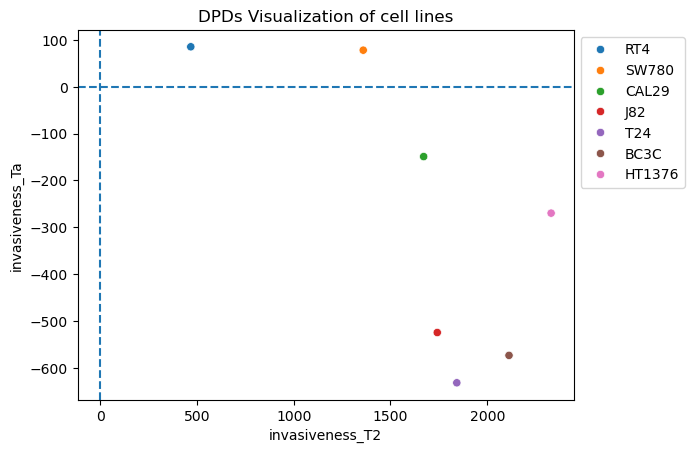

In [111]:
import seaborn as sns
sns.scatterplot(df,y='invasiveness_Ta',x='invasiveness_T2',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))


## LINCs genes now

In [114]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)


,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [152]:
scvi_lfc_ta_int_lincs= scvi_lfc_ta_int.index.intersection(genes_list)


In [154]:
scvi_lfc_ta_int_lincs = scvi_lfc_ta_int.loc[scvi_lfc_ta_int.index.intersection(genes_list)]

In [155]:
scvi_lfc_df_lincs = scvi_lfc_df.loc[scvi_lfc_df.index.intersection(genes_list)]

In [ ]:
#179 genes shared in both vectors and lincs genes 

In [178]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_ta_int_lincs.index)]
display(blca_lm)
scvi_lfc_df_lincs= scvi_lfc_df_lincs.loc[blca_lm.columns]

,TSPAN6,FYN,TIMP2,DSG2,HERPUD1,RRP12,LAMA3,TRAPPC3,HMG20B,MYLK,...,ERO1A,TFDP1,HSD17B11,CTNND1,PSMB8,HLA-DRA,HSPA1A,TSPAN4,CEBPD,HOXA10
ACH-001113,4.331992,2.797013,3.646163,6.329841,5.857235,4.771886,2.157044,6.389739,5.574404,3.189034,...,5.003602,5.790772,5.369466,5.728193,5.921960,0.263034,7.849124,3.130931,2.003602,0.000000
ACH-001289,4.567424,7.561708,5.256256,4.140779,7.183586,3.923149,1.704872,6.813781,4.372256,0.411426,...,4.157044,6.607922,6.132988,6.908333,0.084064,0.084064,4.778734,5.008541,0.356144,0.622930
ACH-001339,3.150560,6.518378,8.465077,5.095924,6.497772,3.682573,0.505891,6.178515,5.524816,4.780310,...,5.183089,6.760354,5.802969,5.478648,6.931210,10.273679,5.247168,6.616475,1.807355,4.326250
ACH-001538,5.085340,3.273516,5.365273,6.800771,5.951401,3.576522,5.074249,5.939697,5.408712,4.698774,...,6.345716,6.535120,5.980025,6.795455,7.651267,4.538538,7.664838,4.632850,4.357552,0.042644
ACH-000242,6.729417,2.996389,1.000000,5.508746,4.886550,4.263786,3.679199,5.986638,5.740388,3.232661,...,6.096979,6.715207,5.318317,7.017365,5.642124,2.077243,6.234770,1.948601,3.440952,3.729009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.630522,0.815575,0.238787,5.168722,5.084490,0.985500,6.021035,5.229203,0.275007,...,4.273516,7.739646,4.287620,2.589763,5.655924,10.157347,1.956057,2.650765,0.356144,3.416840
ACH-002669,3.111031,1.560715,5.879461,6.405822,4.763943,4.865919,4.633431,5.740928,3.082362,1.292782,...,6.723012,6.243555,5.199672,6.334318,7.102973,0.863938,1.636915,5.259272,2.310340,3.521051
ACH-001858,4.390943,4.814038,8.788098,5.229203,6.102448,4.042644,3.392317,6.672284,5.804260,6.023921,...,5.651052,5.923862,4.816600,6.154413,6.942280,0.150560,6.972118,6.296090,2.948601,3.240314
ACH-001997,5.057450,5.101398,8.086508,6.483816,6.183288,4.398487,7.089901,6.249635,5.522307,0.659925,...,5.384395,5.993221,5.909293,6.199672,7.445843,0.565597,6.442280,3.867896,2.835924,3.381283


In [179]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [180]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_ta_int_lincs['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,-225.585146
ACH-001289,-212.810554
ACH-001339,-247.919929
ACH-001538,-238.157143
ACH-000242,-172.171856
...,...
ACH-000285,-282.024044
ACH-002669,-226.535343
ACH-001858,-217.306213
ACH-001997,-187.165206


In [181]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines_1= DPD_df.loc[cell_line_ids]
DPD_cell_lines_1['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines_1


,invasiveness,cell_line_name
ACH-000142,-220.034182,CAL29
ACH-000593,-232.377668,BC3C
ACH-000396,-227.936483,J82
ACH-000242,-172.171856,RT4
ACH-000384,-200.856000,SW780
ACH-000018,-246.875219,T24
ACH-000724,-204.926516,HT1376


In [227]:
scvi_lfc_df_lincs.index.intersection(genes_list)

Index(['TSPAN6', 'FYN', 'TIMP2', 'DSG2', 'HERPUD1', 'RRP12', 'LAMA3',
       'TRAPPC3', 'HMG20B', 'MYLK',
       ...
       'ERO1A', 'TFDP1', 'HSD17B11', 'CTNND1', 'PSMB8', 'HLA-DRA', 'HSPA1A',
       'TSPAN4', 'CEBPD', 'HOXA10'],
      dtype='object', length=179)

In [175]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_df_lincs.index)]
display(blca_lm)

scvi_lfc_df_lincs= scvi_lfc_df_lincs.loc[blca_lm.columns]

,TSPAN6,FYN,TIMP2,DSG2,HERPUD1,RRP12,LAMA3,TRAPPC3,HMG20B,MYLK,...,ERO1A,TFDP1,HSD17B11,CTNND1,PSMB8,HLA-DRA,HSPA1A,TSPAN4,CEBPD,HOXA10
ACH-001113,4.331992,2.797013,3.646163,6.329841,5.857235,4.771886,2.157044,6.389739,5.574404,3.189034,...,5.003602,5.790772,5.369466,5.728193,5.921960,0.263034,7.849124,3.130931,2.003602,0.000000
ACH-001289,4.567424,7.561708,5.256256,4.140779,7.183586,3.923149,1.704872,6.813781,4.372256,0.411426,...,4.157044,6.607922,6.132988,6.908333,0.084064,0.084064,4.778734,5.008541,0.356144,0.622930
ACH-001339,3.150560,6.518378,8.465077,5.095924,6.497772,3.682573,0.505891,6.178515,5.524816,4.780310,...,5.183089,6.760354,5.802969,5.478648,6.931210,10.273679,5.247168,6.616475,1.807355,4.326250
ACH-001538,5.085340,3.273516,5.365273,6.800771,5.951401,3.576522,5.074249,5.939697,5.408712,4.698774,...,6.345716,6.535120,5.980025,6.795455,7.651267,4.538538,7.664838,4.632850,4.357552,0.042644
ACH-000242,6.729417,2.996389,1.000000,5.508746,4.886550,4.263786,3.679199,5.986638,5.740388,3.232661,...,6.096979,6.715207,5.318317,7.017365,5.642124,2.077243,6.234770,1.948601,3.440952,3.729009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.630522,0.815575,0.238787,5.168722,5.084490,0.985500,6.021035,5.229203,0.275007,...,4.273516,7.739646,4.287620,2.589763,5.655924,10.157347,1.956057,2.650765,0.356144,3.416840
ACH-002669,3.111031,1.560715,5.879461,6.405822,4.763943,4.865919,4.633431,5.740928,3.082362,1.292782,...,6.723012,6.243555,5.199672,6.334318,7.102973,0.863938,1.636915,5.259272,2.310340,3.521051
ACH-001858,4.390943,4.814038,8.788098,5.229203,6.102448,4.042644,3.392317,6.672284,5.804260,6.023921,...,5.651052,5.923862,4.816600,6.154413,6.942280,0.150560,6.972118,6.296090,2.948601,3.240314
ACH-001997,5.057450,5.101398,8.086508,6.483816,6.183288,4.398487,7.089901,6.249635,5.522307,0.659925,...,5.384395,5.993221,5.909293,6.199672,7.445843,0.565597,6.442280,3.867896,2.835924,3.381283


In [176]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_df_lincs['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,406.967028
ACH-001289,508.686023
ACH-001339,448.967134
ACH-001538,459.119477
ACH-000242,309.692170
...,...
ACH-000285,540.103101
ACH-002669,401.052197
ACH-001858,399.563435
ACH-001997,411.012767


In [177]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,329.278966,CAL29
ACH-000593,410.535269,BC3C
ACH-000396,385.801646,J82
ACH-000242,309.692170,RT4
ACH-000384,385.598630,SW780
ACH-000018,455.858153,T24
ACH-000724,488.622702,HT1376


In [182]:
DPD_cell_lines['Ta_inv']=0 

,invasiveness,cell_line_name
ACH-000142,-220.034182,CAL29
ACH-000593,-232.377668,BC3C
ACH-000396,-227.936483,J82
ACH-000242,-172.171856,RT4
ACH-000384,-200.856000,SW780
ACH-000018,-246.875219,T24
ACH-000724,-204.926516,HT1376


In [184]:
for i in DPD_cell_lines.index:
    DPD_cell_lines.loc[i,'Ta_inv'] = DPD_cell_lines_1.loc[i,'invasiveness']

In [185]:
DPD_cell_lines

,invasiveness,cell_line_name,Ta_inv
ACH-000142,329.278966,CAL29,-220.034182
ACH-000593,410.535269,BC3C,-232.377668
ACH-000396,385.801646,J82,-227.936483
ACH-000242,309.692170,RT4,-172.171856
ACH-000384,385.598630,SW780,-200.856000
ACH-000018,455.858153,T24,-246.875219
ACH-000724,488.622702,HT1376,-204.926516


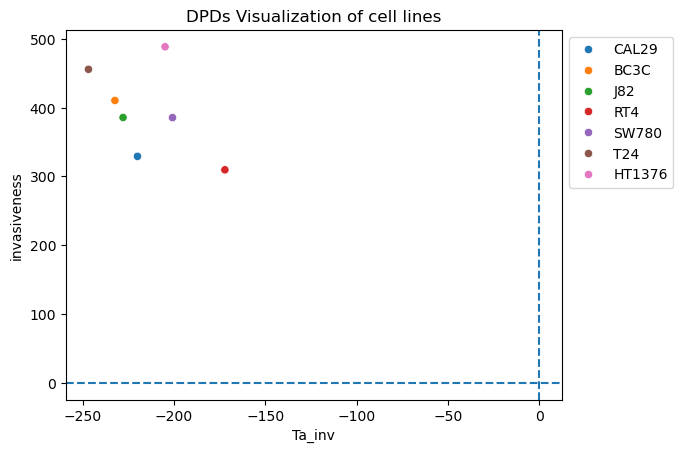

In [186]:

sns.scatterplot(DPD_cell_lines,y='invasiveness',x='Ta_inv',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))


In [ ]:
WORKED OMG!!!

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters


In [ ]:
	invasiveness	cell_line_name
ACH-000142	-220.034182	CAL29
ACH-000593	-232.377668	BC3C
ACH-000396	-227.936483	J82
ACH-000242	-172.171856	RT4
ACH-000384	-200.856000	SW780
ACH-000018	-246.875219	T24
ACH-000724	-204.926516	HT1376

In [ ]:
#Not successful stratification vector 

### Only T2 cluster1 genes <0.05

In [187]:
de_comp_importance= pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_t2_cluster1_DEG.xlsx')

In [190]:
vector= de_comp_importance['lfc_mean']

In [202]:
scvi_lfc_t2_int_lincs = vector.loc[vector.index.intersection(genes_list)]

In [203]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_t2_int_lincs.index)]
display(blca_lm)
scvi_lfc_t2_int_lincs= scvi_lfc_t2_int_lincs.loc[blca_lm.columns]

,TIMP2,DSG2,MYLK,FGFR2,PTGS2,EDN1,CXCL2,AURKA,DHRS7,MYL9,...,PLK1,PRR15L,FOSL1,TUBB6,AURKB,GATA2,MUC1,HLA-DRA,HSPA1A,TSPAN4
ACH-001113,3.646163,6.329841,3.189034,3.767655,0.333424,4.363171,2.485427,6.819029,5.396091,0.000000,...,5.003602,0.839960,4.198494,6.994240,4.644433,2.163499,1.310340,0.263034,7.849124,3.130931
ACH-001289,5.256256,4.140779,0.411426,8.595183,0.925999,0.422233,0.000000,6.100978,6.717951,0.286881,...,5.875534,1.565597,1.405992,6.273516,5.830103,1.589763,3.336283,0.084064,4.778734,5.008541
ACH-001339,8.465077,5.095924,4.780310,0.137504,2.873813,0.356144,0.356144,6.797272,4.947199,2.634593,...,5.908573,0.084064,6.754086,6.979568,6.835545,1.367371,1.150560,10.273679,5.247168,6.616475
ACH-001538,5.365273,6.800771,4.698774,1.875780,2.084064,0.526069,2.498251,6.509062,7.140779,0.344828,...,5.420213,1.799087,6.613826,4.557655,5.541639,0.097611,1.604071,4.538538,7.664838,4.632850
ACH-000242,1.000000,5.508746,3.232661,4.000000,1.443607,2.604071,0.124328,5.882643,5.816088,2.748461,...,5.642413,2.032101,3.243364,4.081510,6.180108,4.763943,1.910733,2.077243,6.234770,1.948601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.815575,0.238787,0.275007,0.056584,0.084064,0.111031,0.028569,6.715893,3.922198,0.333424,...,6.798958,0.201634,0.367371,5.443938,6.797791,0.163499,0.555816,10.157347,1.956057,2.650765
ACH-002669,5.879461,6.405822,1.292782,0.815575,3.543496,3.518535,5.626439,5.844737,6.719183,2.560715,...,5.677790,0.150560,7.269688,1.959770,6.184280,1.765535,6.950585,0.863938,1.636915,5.259272
ACH-001858,8.788098,5.229203,6.023921,0.250962,0.659925,4.142413,2.283922,6.010556,5.988230,6.117903,...,5.493775,0.356144,7.309249,6.811471,6.593055,2.090853,5.649041,0.150560,6.972118,6.296090
ACH-001997,8.086508,6.483816,0.659925,3.689299,0.669027,5.263034,1.618239,6.136479,7.182494,3.948601,...,5.578939,4.047015,7.432458,4.090007,6.496015,0.678072,8.003658,0.565597,6.442280,3.867896


In [206]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_t2_int_lincs.values)

display(DPD_df)

,invasiveness
ACH-001113,-109.976949
ACH-001289,-103.119871
ACH-001339,-156.137391
ACH-001538,-97.058053
ACH-000242,-75.393210
...,...
ACH-000285,-87.893312
ACH-002669,-91.589371
ACH-001858,-141.586450
ACH-001997,-93.815485


In [207]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-130.293040,CAL29
ACH-000593,-125.154654,BC3C
ACH-000396,-118.789731,J82
ACH-000242,-75.393210,RT4
ACH-000384,-100.491801,SW780
ACH-000018,-112.075912,T24
ACH-000724,-105.730108,HT1376


### STVs from cells of Ta and T2 origin with LINCS genes Ta-, T2 +

In [228]:
stv_new =  pd.read_pickle("/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv.pkl")

In [230]:
stv_new= stv_new['n']

In [231]:
blca_lm=blca[blca.columns.intersection(stv_new.index)]
display(blca_lm)

,TSPAN6,SCYL3,BAD,LAP3,SNX11,CASP10,CFLAR,FKBP4,RBM6,SLC25A13,...,TWF2,HOXA10,LYN,CHMP4A,POLG2,RBM15B,MRPL12,IKBKE,DUSP14,PIP4K2B
ACH-001113,4.331992,2.792855,5.159871,4.783457,4.218781,2.000000,5.040454,6.632850,5.515069,3.276497,...,3.864929,0.000000,3.023255,6.287805,5.244126,3.620586,5.084064,0.097611,5.105594,4.934517
ACH-001289,4.567424,2.543496,5.543805,6.333782,4.289097,0.286881,4.414812,6.336462,5.490570,4.709842,...,4.882154,0.622930,1.469886,6.627753,4.154616,4.112700,5.460415,0.925999,5.304146,4.956986
ACH-001339,3.150560,2.333424,4.549053,6.161081,4.205549,1.207893,4.683135,5.364222,4.513491,5.195348,...,5.148527,4.326250,2.735522,5.694602,3.333424,3.190615,6.217812,2.516015,5.570159,4.213347
ACH-001538,5.085340,2.545968,5.537917,5.244887,3.438293,2.704872,4.514122,6.442612,5.146085,4.154616,...,5.439956,0.042644,3.053111,6.090218,3.842979,3.654206,6.721236,3.023255,4.100137,3.817623
ACH-000242,6.729417,2.456806,6.120186,5.712045,3.962549,1.996389,4.348374,6.162492,6.155628,4.974529,...,5.099295,3.729009,2.166715,6.642557,2.992768,5.202026,7.414558,3.651913,3.785551,4.192983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,3.266037,6.109987,6.055933,4.838448,0.226509,2.684819,7.425342,6.404120,3.891419,...,5.557961,3.416840,4.048759,6.602884,5.776630,4.876762,7.796559,3.710393,3.163499,5.390255
ACH-002669,3.111031,1.541019,4.179511,5.836429,3.576522,3.428946,6.235727,6.324091,4.473137,4.909293,...,3.860963,3.521051,3.935460,6.144658,3.381283,2.994580,5.622930,3.358959,4.634012,3.107688
ACH-001858,4.390943,1.887525,5.680324,5.381283,3.939227,2.087463,5.052242,4.890933,4.512859,4.650190,...,5.745506,3.240314,3.563158,5.743623,3.634593,3.759156,6.482687,3.794936,4.737687,4.450881
ACH-001997,5.057450,2.538538,6.194954,7.678072,4.464668,2.066950,5.054414,5.929081,4.768184,4.522935,...,5.366672,3.381283,3.522307,6.693348,3.656496,4.169925,7.405822,2.987321,5.858727,3.737687


In [232]:
stv_new= stv_new.loc[blca_lm.columns]

In [233]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], stv_new.values)

display(DPD_df)

,invasiveness
ACH-001113,-21.540136
ACH-001289,-21.438901
ACH-001339,-22.246127
ACH-001538,-21.980843
ACH-000242,-25.471099
...,...
ACH-000285,-17.364708
ACH-002669,-20.657503
ACH-001858,-24.642060
ACH-001997,-23.508735


In [234]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-23.454942,CAL29
ACH-000593,-22.685778,BC3C
ACH-000396,-23.800621,J82
ACH-000242,-25.471099,RT4
ACH-000384,-25.066518,SW780
ACH-000018,-21.569904,T24
ACH-000724,-24.689943,HT1376


### Cluster 3 DEGs

In [235]:
cluster3_lfc = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG_1.xlsx',index_col=0)

In [261]:
cluster3_T2 = cluster3_lfc.iloc[6000:8000][['Gene','lfc_mean']]
cluster3_T2.reset_index(inplace=True)
cluster3_T2.drop(columns=['comparison'],inplace=True)
cluster3_T2.set_index('Gene',inplace=True)
cluster3_T2

,lfc_mean
Gene,
S100A8,9.952347
TCHH,7.817023
LYNX1,7.238245
SERPINB4,6.948934
KRTDAP,6.676867
...,...
TRIM31,-6.078705
TESC,-6.369891
IGFBP2,-6.542513


In [262]:
blca_lm=blca[blca.columns.intersection(cluster3_T2.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [263]:
cluster3_T2=cluster3_T2.loc[blca.columns.intersection(cluster3_T2.index)]
cluster3_T2

,lfc_mean
TSPAN6,-0.269631
GCLC,-1.751781
CD99,0.414643
HS3ST1,-1.565612
TMEM176A,0.020122
...,...
CCL3L3,1.310538
MARCKS,1.136047
CCL3,1.437942
CISD3,-0.128588


In [264]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], cluster3_T2['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2779.851276
ACH-001289,2362.596662
ACH-001339,2492.402285
ACH-001538,2731.625117
ACH-000242,1208.533428
...,...
ACH-000285,2991.244637
ACH-002669,2371.692670
ACH-001858,2322.170907
ACH-001997,2043.424701


In [265]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines1= DPD_df.loc[cell_line_ids]
DPD_cell_lines1['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines1


,invasiveness,cell_line_name
ACH-000142,2320.662048,CAL29
ACH-000593,2780.657899,BC3C
ACH-000396,2468.796631,J82
ACH-000242,1208.533428,RT4
ACH-000384,1997.916810,SW780
ACH-000018,2597.707944,T24
ACH-000724,2955.765929,HT1376


In [255]:
cluster3_Ta = cluster3_lfc.iloc[8000:][['Gene','lfc_mean']]
cluster3_Ta.reset_index(inplace=True)
cluster3_Ta.drop(columns=['comparison'],inplace=True)
cluster3_Ta.set_index('Gene',inplace=True)
cluster3_Ta

,lfc_mean
Gene,
PLA2G2A,4.706354
GPX3,4.511640
EPB41L3,4.122284
EREG,3.972359
CYP1A1,3.870992
...,...
DNAJC15,-3.063562
IGHA1,-3.213724
BASP1,-3.283223


In [256]:
blca_lm=blca[blca.columns.intersection(cluster3_Ta.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [258]:
cluster3_Ta=cluster3_Ta.loc[blca.columns.intersection(cluster3_Ta.index)]
cluster3_Ta

,lfc_mean
TSPAN6,0.528932
GCLC,1.700422
CD99,0.593422
HS3ST1,0.862836
TMEM176A,-1.527470
...,...
CCL3L3,-0.627989
MARCKS,0.207946
CCL3,-0.712292
CISD3,0.542104


In [259]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], cluster3_Ta['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2148.424004
ACH-001289,2191.733751
ACH-001339,2053.519540
ACH-001538,2122.830897
ACH-000242,2643.238804
...,...
ACH-000285,1888.741389
ACH-002669,1936.191137
ACH-001858,2106.753520
ACH-001997,2149.345018


In [260]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,2584.935997,CAL29
ACH-000593,2246.168238,BC3C
ACH-000396,2309.969701,J82
ACH-000242,2643.238804,RT4
ACH-000384,2690.109856,SW780
ACH-000018,2313.796487,T24
ACH-000724,2349.452149,HT1376


In [266]:
DPD_cell_lines['T2_inv'] = 0
for i in DPD_cell_lines.index:
    DPD_cell_lines.loc[i,'T2_inv']=DPD_cell_lines1.loc[i,'invasiveness']

/tmp/ipykernel_815011/2698091362.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2320.662047555496' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DPD_cell_lines.loc[i,'T2_inv']=DPD_cell_lines1.loc[i,'invasiveness']


In [267]:
DPD_cell_lines

,invasiveness,cell_line_name,T2_inv
ACH-000142,2584.935997,CAL29,2320.662048
ACH-000593,2246.168238,BC3C,2780.657899
ACH-000396,2309.969701,J82,2468.796631
ACH-000242,2643.238804,RT4,1208.533428
ACH-000384,2690.109856,SW780,1997.916810
ACH-000018,2313.796487,T24,2597.707944
ACH-000724,2349.452149,HT1376,2955.765929


### CLuster3 

In [30]:
cluster1_lfc = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG_T3_cluster1.xlsx',index_col=0)

In [34]:
cluster1_T3 = cluster1_lfc.iloc[2000:4000][['Gene','lfc_mean']]
cluster1_T3

,Gene,lfc_mean
comparison,,
cluster1_T3 vs Rest,CTD-3252C9.4,0.031479
NaN,SPCS1,0.030802
NaN,IRS2,0.028190
NaN,RP11-297N6.4,0.025961
NaN,OPTN,0.025904
...,...,...
NaN,TUBB,-0.027483
NaN,MS4A4A,-0.028842
NaN,TMEM107,-0.030057


In [35]:
cluster1_T3.reset_index(inplace=True)
cluster1_T3.drop(columns=['comparison'],inplace=True)
cluster1_T3.set_index('Gene',inplace=True)
cluster1_T3

,lfc_mean
Gene,
CTD-3252C9.4,0.031479
SPCS1,0.030802
IRS2,0.028190
RP11-297N6.4,0.025961
OPTN,0.025904
...,...
TUBB,-0.027483
MS4A4A,-0.028842
TMEM107,-0.030057


In [36]:
blca_lm=blca[blca.columns.intersection(cluster1_T3.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [37]:
cluster1_T3=cluster1_T3.loc[blca.columns.intersection(cluster1_T3.index)]
cluster1_T3

,lfc_mean
TSPAN6,-0.009014
GCLC,-0.014242
CD99,-0.016205
HS3ST1,0.011068
TMEM176A,-0.001574
...,...
CCL3L3,0.003886
MARCKS,0.006257
CCL3,0.005003
CISD3,0.003831


In [39]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], cluster1_T3['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2.577693
ACH-001289,3.186760
ACH-001339,3.027278
ACH-001538,2.347893
ACH-000242,3.459217
...,...
ACH-000285,2.148375
ACH-002669,2.469893
ACH-001858,2.374619
ACH-001997,2.562443


In [40]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,2.453214,CAL29
ACH-000593,2.143228,BC3C
ACH-000396,2.031041,J82
ACH-000242,3.459217,RT4
ACH-000384,3.067423,SW780
ACH-000018,1.277159,T24
ACH-000724,2.591680,HT1376


### previous

In [ ]:
#dot product
blca_lm=blca[blca.columns.intersection(logfold_df['query'].values)]
display(blca_lm)

,ADGRA2,MYOC,SOAT1,NTN1,TGFBR3,IPCEF1,FGFR1,REM1,P2RX7,ISM1,...,BHLHA15,OLFML1,TPCN1,TLE1,ANXA4,MAFB,TCEA3,EBF2,SPRR2F,FXYD1
ACH-001113,0.310340,0.000000,4.635174,0.910733,3.936402,0.028569,4.413459,0.000000,0.344828,0.042644,...,0.333424,0.028569,3.691534,3.727920,5.460087,4.043519,3.032101,0.042644,0.000000,1.480265
ACH-001289,0.536053,0.042644,4.298658,7.566206,2.097611,2.014355,8.534264,0.000000,0.056584,0.028569,...,1.827819,3.795975,1.599318,3.867896,5.842225,0.014355,0.485427,0.238787,0.000000,0.344828
ACH-001339,2.166715,0.659925,4.249445,0.111031,3.272023,0.042644,2.513491,1.475085,4.223423,0.189034,...,0.111031,0.056584,3.275007,3.792855,5.487679,0.731183,0.238787,0.056584,0.000000,1.443607
ACH-001538,0.163499,0.000000,3.451541,0.000000,1.150560,0.731183,0.084064,0.000000,0.124328,1.963474,...,0.505891,0.000000,4.319040,4.032982,5.092123,0.176323,3.273516,0.000000,0.400538,0.000000
ACH-000242,0.084064,0.000000,3.226509,0.150560,4.971314,0.985500,0.356144,0.000000,0.028569,0.163499,...,0.028569,0.097611,5.126395,4.780310,6.092123,0.565597,0.137504,0.000000,0.000000,0.084064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.176323,0.000000,4.456149,0.464668,0.176323,0.028569,0.505891,0.000000,0.214125,0.000000,...,0.400538,0.310340,5.372952,4.633431,0.963474,0.000000,0.056584,0.028569,0.000000,1.510962
ACH-002669,0.815575,0.000000,3.732269,1.304511,0.604071,0.042644,1.195348,0.000000,0.084064,0.863938,...,1.933573,0.028569,3.775051,4.142413,5.722739,0.084064,3.798051,0.000000,0.000000,0.584963
ACH-001858,0.641546,0.000000,4.559492,0.028569,1.395063,0.014355,4.874797,0.014355,0.910733,0.014355,...,0.250962,0.000000,5.701272,6.050937,5.572283,0.056584,0.475085,2.035624,0.000000,0.000000
ACH-001997,0.042644,0.000000,2.976364,0.056584,1.405992,0.000000,0.014355,0.000000,0.163499,0.014355,...,0.124328,0.000000,3.990047,5.159871,7.353676,0.000000,0.042644,0.000000,0.000000,0.070389


In [ ]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [ ]:
DPD_df

,invasiveness
ACH-001113,0.0
ACH-001289,0.0
ACH-001339,0.0
ACH-001538,0.0
ACH-000242,0.0
...,...
ACH-000285,0.0
ACH-002669,0.0
ACH-001858,0.0
ACH-001997,0.0


In [ ]:
vector = logfold_df[['query','logFC']]
vector.set_index('query',inplace=True)
vector= vector.loc[blca.columns.intersection(logfold_df['query'].values)]

In [ ]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], vector.loc[:, 'logFC'])

display(DPD_df)

,invasiveness
ACH-001113,-143.538467
ACH-001289,-183.784108
ACH-001339,-173.320454
ACH-001538,-93.455568
ACH-000242,-116.856270
...,...
ACH-000285,-89.454437
ACH-002669,-113.632540
ACH-001858,-158.769753
ACH-001997,-90.367655


In [ ]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [ ]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-137.244719,CAL29
ACH-000593,-145.950904,BC3C
ACH-000396,-158.354899,J82
ACH-000242,-116.856270,RT4
ACH-000384,-122.446398,SW780
ACH-000018,-122.575912,T24
ACH-000724,-159.888360,HT1376


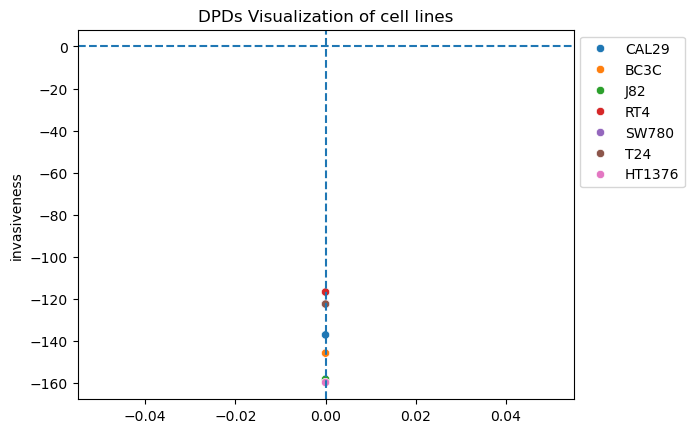

In [ ]:
sns.scatterplot(DPD_cell_lines,x=np.zeros(7),y='invasiveness',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)
